# SAS to Python Workshop

Why move to Python?
1. It's FREE
1. Better at graphical outputs
1. It's becoming more popular in corporate jobs
1. There may not be a structured support, however you will always find a solution online

For more \
https://burtchworks.com/industry-insights/2020-sas-r-or-python-survey-results-which-tool-do-data-scientists-analytics-pros-prefer

# Pandas

The Pandas package is a data analysis and manipulation tool used for working with structured data, particularly in tabular form. It is used in analysis to preprocess, clean, and transform data such as loan payment histories, credit scores, and financial statements before building predictive models or performing statistical analyses.

- ALWAYS consult the documentation. 
Docs: https://pandas.pydata.org/docs/
- It's great to build your own functions and processes, but it is best to use pandas functions, they will inevitably be faster. Can anyone guess why?

<img src="./Pandas C Scooby Doo.jpg" 
     align="center" 
     width="500" />


## Quick intro to Pandas and Numpy

Before we start, let's introduce a couple of concepts when using a Pandas and Python in general. 

First, let's discuss pandas. Pandas is a third-party module that you install in your environment and utilise to handle data manipulation. We are interested in pandas functions, data structure objects (DataFrames and Series), methods and attributes.
***
- **Import the package**
    - always import pandas under its alias: pd
    - we will use pd.function_name() to invoke any pandas function
***
- **DataFrame** a table to hold our data, it is composed of:
    - one or more pandas Series (similar to a column in a table).
    - two index objects:
        - a fixed list: 0 to n-1 where n is the number of records on the y-axis; and
        - a list of keys (column/Series names on the x-axis) 
***
- **Series** an array-like object with a name, an array of values orderde by an index
    - a Series can be a component in a DataFrame (it will share an index).
    - a Series can be a standalone object not belonging to a DataFrame.
***
- **Functions** are independent blocks of code that we can call and execute at any time.
    - They can parametric or non-parametric.
    - There are built in Python functions you can call at any time.
    - There are third-party module functions that require import and an alias prefix e.g. pd.read_csv()
    - There are user-defined functions and user-defined lambda functions (quick, lazily function)
    - They can be nested e.g. print(pd.read_csv('csv_file_name.csv'))
***  
- **Methods** are functions that are linked to a class or an object.
    - In order to invoke a method, they need to be executed with an instance of the class/object to which they belong.
    - DataFrame.`head()` or Series.`head()` is a method that belongs to the DataFrame and Series objects. It cannot be applied to different objects.
    - Methods can sometimes be nested, but the syntax is different. e.g. Series.`head()`.`round()`. In this case `Series` is a parameter for `head()` iwhich is a parameter for `round()`.
*** 
- **Attributes** are variables that belong to an object and contain information or characteristics about the object.
    - Syntactically, they look like and are invoked like methods except they are non-parametric and are not followed by parentheses.
    - e.g. DataFrame.shape returns a tuple containing the dimensions of a DataFrame (number of rows, number of columns/Series)
    - e.g. DataFrame.columns returns a list-like object containing the names of the columns/Series in the DataFrame object.
***

In [24]:
#importing pandas and numpy
import pandas as pd
import numpy as np

In [14]:
# reading the dataset
Dec_df = pd.read_csv('loan_data_20221231.csv')

## Data Import

### SAS equivalent: PROC IMPORT

```sas
PROC IMPORT OUT = Dec_df 
        DATAFILE = "file_location/loan_data_20221231.csv" 
    DBMS = csv REPLACE; 
    GETNAMES = YES; 
RUN;
```

### From CSV
Documentation: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

The method ```pd.read_csv()``` is used to read csv files into Python. If the file is located in the same folder of the ipynb file we do not need to specify the entire  path.

For more flexibility, additional optional arguments can be used:
- change columns names (header=0)
- read a limited number of row (nrows)
- specify datatype (dtype)

Other Data Sources:
- pd.read_excel()
- many more depending on your data source...the documentation is your friend

In [25]:
Dec_df = pd.read_csv('loan_data_20221231.csv')



# file is located in the same directory as the notebook
# only one mandatory arg, many useful keyword args in documentation cover:
Dec_df.rename(columns={" facility.id " : "facility.id"},
              inplace=True # apply all renames in_place
             )

## Data Exploration and Dataset Cleaning

### Data exploration

DataFrame & Series methods to review a dataset, see docs:
- https://pandas.pydata.org/docs/reference/frame.html
- https://pandas.pydata.org/docs/reference/series.html

Some useful methods and attributes to explore a dataframe or a series:
- ```.info()```
- ```.shape```
- ```.columns```
- ```.dtypes```
- ```.size```
- ```.axes```
- ```.head()```
- ```.tail()```
- ```.sample()```
- ```.describe()```
- ```.value_counts()```

Use the function above and try to understand what they are doing, or search them in the documentation above. How does the output change if you include some parameters?

Disclaimer: One of the functions may give meaningless output with a dataframe.

In [29]:
Dec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9223 entries, 0 to 9222
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   facility.id          9223 non-null   int64  
 1   credit.policy        9223 non-null   int64  
 2   purpose              9223 non-null   object 
 3   int.rate             9223 non-null   float64
 4   installment          9223 non-null   float64
 5   log.annual.inc       9223 non-null   float64
 6   dti                  9223 non-null   float64
 7   fico                 9223 non-null   int64  
 8   days.with.cr.line    9223 non-null   float64
 9   revol.bal            9223 non-null   int64  
 10  revol.util           9223 non-null   float64
 11  inq.last.6mths       9223 non-null   int64  
 12  delinq.2yrs          9223 non-null   int64  
 13  pub.rec              9223 non-null   int64  
 14  not.fully.paid       9223 non-null   int64  
 15  updated_utilisation  9114 non-null   f

In [33]:
Dec_df.shape

(9223, 16)

In [34]:
Dec_df.columns

Index(['facility.id', 'credit.policy', 'purpose', 'int.rate', 'installment',
       'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal',
       'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec',
       'not.fully.paid', 'updated_utilisation'],
      dtype='object')

In [35]:
Dec_df.dtypes

facility.id              int64
credit.policy            int64
purpose                 object
int.rate               float64
installment            float64
log.annual.inc         float64
dti                    float64
fico                     int64
days.with.cr.line      float64
revol.bal                int64
revol.util             float64
inq.last.6mths           int64
delinq.2yrs              int64
pub.rec                  int64
not.fully.paid           int64
updated_utilisation    float64
dtype: object

In [36]:
Dec_df.size

147568

In [37]:
Dec_df.axes

[RangeIndex(start=0, stop=9223, step=1),
 Index(['facility.id', 'credit.policy', 'purpose', 'int.rate', 'installment',
        'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal',
        'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec',
        'not.fully.paid', 'updated_utilisation'],
       dtype='object')]

In [31]:
Dec_df.describe()

,facility.id,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,updated_utilisation
count,9.223000e+03,9223.000000,9223.000000,9223.000000,9223.000000,9223.000000,9223.000000,9223.000000,9.223000e+03,9223.000000,9223.000000,9223.000000,9223.000000,9223.000000,9114.0
mean,9.937368e+13,0.806028,0.122617,318.404088,10.938801,12.786278,710.156240,4584.856048,1.756098e+04,48.307013,1.568145,0.161444,0.063103,0.160143,-inf
std,9.501972e+10,0.395428,0.026808,205.763579,0.605386,6.816821,37.372384,2483.893335,3.423517e+04,28.281947,2.181946,0.528786,0.264521,0.366759,NaN
min,9.922223e+13,0.000000,0.060000,15.690000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-inf
25%,9.922223e+13,1.000000,0.103900,163.770000,10.571317,7.460000,682.000000,2850.000000,3.712500e+03,24.700000,0.000000,0.000000,0.000000,0.000000,23.6
50%,9.944441e+13,1.000000,0.122200,268.950000,10.933107,12.870000,707.000000,4140.041667,9.044000e+03,47.800000,1.000000,0.000000,0.000000,0.000000,46.6
75%,9.944441e+13,1.000000,0.140700,430.750000,11.295484,18.090000,737.000000,5760.000000,1.889550e+04,71.800000,2.000000,0.000000,0.000000,0.000000,70.4
max,9.944441e+13,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,11.000000,5.000000,1.000000,110.3


### Slicing

To access 1 or more columns from a dataframe we can use:
- series attribute <br>
    Syntax: df.column_name which returns a pandas Series
<br>
- slicing <br>
    Syntax 1: pass a literal string or a variable string
        var_column = 'column_name'
        df[var_column] which returns a pandas Series
        
        or
        
        df['column_name'] which returns a pandas Series

    Syntax 2: pass a literal list or a variable list
        var_list = ['column_name_1', 'column_name_2']
        df[var_list] which returns a pandas DataFrame

        or
        
        df[['column_name_1', 'column_name_2']] which returns a pandas DataFrame


- `.loc[]` and `.iloc[]` methods

For more on ```loc[]``` and ```iloc[]``` https://www.geeksforgeeks.org/difference-between-loc-and-iloc-in-pandas-dataframe/

More on slicing is covered in *"Keep a column"* and in *"Filter a dataset"* later in the course.

In [40]:
# using iloc to access the dataframe
Dec_df.iloc[:,5]

0       10.858999
1       10.491274
2       11.695247
3       11.225243
4       10.668955
          ...    
9218    10.999095
9219    10.933107
9220    12.323856
9221    10.968198
9222    10.645425
Name: log.annual.inc, Length: 9223, dtype: float64

In [9]:
# use columns names to pull 2 columns Dataframe format
Dec_df[["purpose", "inq.last.6mths"]].head()

,purpose,inq.last.6mths
0,credit_card,0
1,debt_consolidation,0
2,credit_card,2
3,debt_consolidation,0
4,debt_consolidation,2


In [6]:
# use loc access several consecutive columns
Dec_df.loc[:,"purpose":"fico"].head()

,purpose,int.rate,installment,log.annual.inc,dti,fico
0,credit_card,0.1091,604.88,10.858999,17.56,707
1,debt_consolidation,0.1343,523.78,10.491274,17.40,667
2,credit_card,0.1583,876.83,11.695247,18.08,677
3,debt_consolidation,0.1520,730.04,11.225243,21.84,677
4,debt_consolidation,0.1299,539.03,10.668955,14.82,677


### SAS equivalent: PROC PRINT

Exploring a dataset starts from looking at (some) of the data. We can use ```.head()``` or ```.tail()``` to look at the first or last 5 observations. This is similar to PROC PRINT in SAS.

```sas
PROC PRINT DATA = Dec_df (OBS = 5);
RUN;
```

In [42]:
# Returns the first 5 rows, pass an integer as a positional argument to specify the number of rows to show
Dec_df.head().style.format(precision=3, thousands=",", decimal=".")

,facility.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,updated_utilisation
0,"99,333,360,000,215",1,credit_card,0.109,604.880,10.859,17.560,707,"8,061.000","32,438",43.000,0,1,0,1,43.300
1,"99,444,410,000,288",1,debt_consolidation,0.134,523.780,10.491,17.400,667,"10,380.042","18,403",73.300,0,1,0,1,73.800
2,"99,333,360,000,324",1,credit_card,0.158,876.830,11.695,18.080,677,"3,330.000","62,976",86.100,2,2,0,1,87.200
3,"99,444,410,000,370",1,debt_consolidation,0.152,730.040,11.225,21.840,677,"2,640.042","27,839",72.700,0,1,0,1,73.500
4,"99,444,410,000,383",1,debt_consolidation,0.130,539.030,10.669,14.820,677,"8,159.042","13,115",42.300,2,2,0,1,42.600


In [43]:
# Returns the last 2 rows, pass an integer as a positional argument to specify the number of rows to show
Dec_df.tail(2)

,facility.id,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,updated_utilisation
9221,99222230009569,0,overdraft,0.1311,101.24,10.968198,8.23,687,2790.041667,1514,13.8,5,0,0,0,13.0
9222,99222230009570,0,overdraft,0.1979,37.06,10.645425,22.17,667,5916.000000,28854,59.8,6,0,1,0,60.7


#### Exercise

How many debt_consolidation in the last 20 rows?

In [11]:
# how many debt_consolidation in the last 20 rows?
Dec_df.tail(20)[["purpose"]].value_counts()

purpose           
debt_consolidation    9
overdraft             8
credit_card           2
small_business        1
Name: count, dtype: int64

### SAS equivalent: PROC CONTENTS
```sas
PROC CONTENTS DATA = Dec_df;
RUN;
```

- The method ```info()``` shows the index, the list of columns in a dataset, the number of rows, the data type for each column and the memory usage.
- The attribute ```shape``` shows number of columns and rows
- The attribute ```columns``` returns the names of the columns


In [12]:
# using info
Dec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9223 entries, 0 to 9222
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   facility.id          9223 non-null   int64  
 1   credit.policy        9223 non-null   int64  
 2   purpose              9223 non-null   object 
 3   int.rate             9223 non-null   float64
 4   installment          9223 non-null   float64
 5   log.annual.inc       9223 non-null   float64
 6   dti                  9223 non-null   float64
 7   fico                 9223 non-null   int64  
 8   days.with.cr.line    9223 non-null   float64
 9   revol.bal            9223 non-null   int64  
 10  revol.util           9223 non-null   float64
 11  inq.last.6mths       9223 non-null   int64  
 12  delinq.2yrs          9223 non-null   int64  
 13  pub.rec              9223 non-null   int64  
 14  not.fully.paid       9223 non-null   int64  
 15  updated_utilisation  9114 non-null   f

In [13]:
# returns a tuple with dimensions (no of rows, no of columns)
Dec_df.shape

(9223, 16)

In [14]:
# returns a Index object (like a series/list) of column labels
Dec_df.columns

Index(['facility.id', 'credit.policy', 'purpose', 'int.rate', 'installment',
       'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal',
       'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec',
       'not.fully.paid', 'updated_utilisation'],
      dtype='object')

In [44]:
type(Dec_df.columns)

pandas.core.indexes.base.Index

In [15]:
# convert it to a list using the built-in list() function
list(Dec_df.columns)

['facility.id',
 'credit.policy',
 'purpose',
 'int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'not.fully.paid',
 'updated_utilisation']

In [16]:
# chaining methods and attributes
Dec_df.head().shape

(5, 16)

### Treating missing values

With missing data we may want to do one of the following:
- are there missing data in the dataset? ```.isna().sum()``` counts missing values for each column.
- which values are not missing? ```.notna()``` identifies non-missing values
- remove missing data: ```.dropna()```. In this case the method ```.reset_index(drop=True)``` should also be added to reset the index of the dataframe
- replace missing data: ```.fillna()```.

For more: https://pandas.pydata.org/docs/user_guide/missing_data.html

In [17]:
# read interest_rate.csv dataset
interest_rate = pd.read_csv("interest_rate_with_missing.csv")

In [18]:
# look at first 10 lines
interest_rate.head(10)

,purpose,int.rate
0,debt_consolidation,0.1189
1,credit_card,0.1071
2,debt_consolidation,0.1357
3,debt_consolidation,0.1008
4,credit_card,NaN
5,credit_card,0.0788
6,debt_consolidation,0.1496
7,overdraft,0.1114
8,home_improvement,0.1134
9,debt_consolidation,0.1221


In [19]:
# count na
interest_rate.isna().sum()

purpose       0
int.rate    954
dtype: int64

In [20]:
# count non-na
interest_rate.notna().sum()

purpose     9578
int.rate    8624
dtype: int64

In [21]:
# drop na and reset index, save in interest_rate_no_na
interest_rate_no_na = interest_rate.dropna().reset_index(drop=True)
interest_rate_no_na.isna().sum()

purpose     0
int.rate    0
dtype: int64

In [22]:
# create int.rate2 with fillna with the mean
interest_rate["int.rate2"] = (interest_rate["int.rate"]
                              .fillna(interest_rate["int.rate"].mean()))

interest_rate.head()

,purpose,int.rate,int.rate2
0,debt_consolidation,0.1189,0.118900
1,credit_card,0.1071,0.107100
2,debt_consolidation,0.1357,0.135700
3,debt_consolidation,0.1008,0.100800
4,credit_card,NaN,0.122589


A bit more complicated solution to the problem: we fill missing values with the average of the group, where the group is the "purpose". The function ```transform``` must return a dataframe with the same length along the axis it's applied on. What this means is that even if ```transform``` is used with a ```groupby``` operation that returns aggregate values, it assigns those aggregate values to each element.

In [23]:
# create int.rate3 with fillna with the mean of group, fillna-groupby-transform
interest_rate["int.rate3"] = (interest_rate["int.rate"]
                                   .fillna(interest_rate
                                           .groupby('purpose')['int.rate']
                                           .transform('mean')))

interest_rate.head()

,purpose,int.rate,int.rate2,int.rate3
0,debt_consolidation,0.1189,0.118900,0.118900
1,credit_card,0.1071,0.107100,0.107100
2,debt_consolidation,0.1357,0.135700,0.135700
3,debt_consolidation,0.1008,0.100800,0.100800
4,credit_card,NaN,0.122589,0.119883


### Renaming columns

If we want to rename **all** columns we can use attribute ```columns```.

**In SAS:**

```sas
DATA interest_rate2; 
    SET interest_rate;
    /* renaming a column */
    RENAME
       loan_type = purpose 
       interest_rate = int.rate;
RUN;
```

In [6]:
# re-read interest_rate_with_missing.csv
interest_rate = pd.read_csv("interest_rate_with_missing.csv")
interest_rate.columns = ["loan_type", "interest_rate"]

interest_rate.columns

Index(['loan_type', 'interest_rate'], dtype='object')

When we have a **large number of columns**, we may want to use something less manual or we may want to change only some of the names. We can use the method ```rename()``` and we need to pass a dictionary with the list of current names mapped into the new names. Our Dec_df has 16 columns and it would be quite long to change each column manually.

For more information about dictionaries see https://docs.python.org/3/tutorial/datastructures.html section 5.5.

### Clean column names
- remove '.' from the names to comply with naming conventions
- Why? 'column.name' stops us using the df.column_name to access a series

We use a list comprehension to edit the Dec_df.columns attribute.
This is similar a DO loop in SAS or a for loop in Python.

In [63]:
#generate a list of variable names using a list comprehension and assign to the df.columns attribute
Dec_df.columns = [column.replace(".","_") for column in Dec_df.columns]

### Use the .rename() method

**In SAS:**
```sas
DATA interest_rate2; 
    SET interest_rate;
    /* renaming a column */
    RENAME
       not_fully_paid = in_default 
       pub_rec = public_recidivism_no_of_records 
       delinq_2yrs = delinq_last_2yrs 
       revol_bal = exposure_balance 
       revol_util = limit_utilisation_rate; 
RUN;
```

In [64]:
# apply rename method to df
# "not_fully_paid" -> "in_default", # pass a dict with current and new variable names to the columns kwarg
# "pub_rec" -> "public_recidivism_no_of_records",
# "delinq_2yrs" -> "delinq_last_2yrs",
# "revol_bal" -> "exposure_balance",
# "revol_util" -> "limit_utilisation_rate"
Dec_df.rename(columns={"not_fully_paid" : "in_default", # pass a dict with current and new variable names to the columns kwarg
                       "pub_rec" : "public_recidivism_no_of_records",
                       "delinq_2yrs" : "delinq_last_2yrs",
                       "revol_bal" : "exposure_balance",
                       "revol_util" : "limit_utilisation_rate"},
              inplace=True # apply all renames in_place
             ) 


# display summary
Dec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9223 entries, 0 to 9222
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   facility_id                      9223 non-null   int64  
 1   credit_policy                    9223 non-null   int64  
 2   purpose                          9223 non-null   object 
 3   int_rate                         9223 non-null   float64
 4   installment                      9223 non-null   float64
 5   log_annual_inc                   9223 non-null   float64
 6   dti                              9223 non-null   float64
 7   fico                             9223 non-null   int64  
 8   days_with_cr_line                9223 non-null   float64
 9   exposure_balance                 9223 non-null   int64  
 10  limit_utilisation_rate           9223 non-null   float64
 11  inq_last_6mths                   9223 non-null   int64  
 12  delinq_last_2yrs    

In [60]:
Dec_df["log.annual.inc"]

0       10.858999
1       10.491274
2       11.695247
3       11.225243
4       10.668955
          ...    
9218    10.999095
9219    10.933107
9220    12.323856
9221    10.968198
9222    10.645425
Name: log.annual.inc, Length: 9223, dtype: float64

### Creating a new variable

Similar to SAS, in Python we can create new variables:
- assigning a constant value
- multiplying an existing column by a constant
- transforming the column with a function (e.g. ```exp```)
- combining 2 or more variables

**In SAS:**
```sas
DATA interest_rate2; 
    SET interest_rate; 
    /* creating a new column */
    meaning_of_life  = 42; 
    log_annual_inc_k = log_annual_inc/1000; 
    annual_income    = round(exp(log_annual_inc),2); 
    loan_to_income   = round(revol_bal/annual_income,0.000001); 
RUN;
```

In [65]:
# add a column "meaning_of_life" with a constant value
Dec_df["meaning_of_life"] = 42 # assign constant value

# get log of annual income "log_annual_inc_k" in thousands
Dec_df["log_annual_inc_k"] = Dec_df["log_annual_inc"]/1000 
# (notice df.column_name method to access series vs df["name"] to declare a new one)

# get annual income without log transformation
# derive variable and assign to new variable name
Dec_df["annual_income"] = np.round(np.exp(Dec_df["log_annual_inc"]),2)

# derive loan to income ratio
Dec_df["loan_to_income"] = np.round(Dec_df["exposure_balance"] / Dec_df["annual_income"],6)

# display head of df for the relevant variables above
#Dec_df[["meaning_of_life", "log_annual_inc_k", "annual_income", "log_annual_inc", "loan_to_income"]].head()

More **<font color=red> advanced </font>** options include:
- using the apply function
- using a lambda function
- creating a function

For this example we load a new dataset containing monthly volumes for 2022 for several different stores. We want to calculate the monthly average for each store and store the values in a new variable.

In [66]:
monthly_vol = pd.read_csv("monthly_volumes.csv")

In [67]:
monthly_vol.head()

,Store,January,February,March,April,May,June,July,August,September,October,November,December
0,1,643,599,354,1101,1025,420,517,1133,971,435,1014,873
1,2,1827,773,2559,1817,2594,2852,2453,2832,1020,2712,1097,2381
2,3,914,1331,1261,636,1008,319,1248,1397,1373,706,934,406
3,4,800,408,664,601,702,664,894,842,381,918,328,839
4,5,971,1029,677,1093,1941,322,396,1070,526,1374,2265,1750


In [68]:
# create an average column
monthly_vol["month_ave"] = monthly_vol.loc[:,"January":"December"  # select "January" to "December" columns
                                          ].apply("mean",axis=1  # apply the mean function along the x-axis i.e. over columns
                                                 ).round()  # round the results
                             
# show results
monthly_vol[["month_ave"]].head()

,month_ave
0,757.0
1,2076.0
2,961.0
3,670.0
4,1118.0


Next we transform the "purpose" variable in our december dataset by collapsing all categories that are not credit cards or overdraft into an "other" category.

It's possible to solve this problem in different way. Here we offer two solutions:
- show how to use ```lambda``` and ```apply``` together
- creating an ad hoc function


In [31]:
# define a lambda function
purpose_lambda = lambda x: x if x in ["credit_card","overdraft"] else "other"

Dec_df["purpose_simple"] = Dec_df["purpose"].apply(purpose_lambda)

Dec_df["purpose_simple"].value_counts()

purpose_simple
other          5657
overdraft      2307
credit_card    1259
Name: count, dtype: int64

In [32]:
def purpose_simple_func(purpose_value):
    """The function accepts a string value which uses a membership test to remap and return to 3 potential string values.
    Args:
        purpose_value (string): the purpose of the facility
    Kwargs:
        None
    Returns:
        remapped_purpose_value (string): the remapped purpose of the facility ('credit_card', 'overdraft', 'other') 
    """
    # check if in list: doesn't need to be remapped
    if purpose_value in ['credit_card', 'overdraft']:
        remapped_purpose_value = purpose_value
    
    # not in the list: remap to 'other'
    else:
        remapped_purpose_value = 'other'
    
    # return the remapped_purpose_value
    return remapped_purpose_value

# create a new series
Dec_df["purpose_simple2"] = Dec_df["purpose"].apply(purpose_simple_func) # apply passes each value to the function and replaces it with the function output
Dec_df["purpose_simple2"].value_counts()

purpose_simple2
other          5657
overdraft      2307
credit_card    1259
Name: count, dtype: int64

### Exercise

Using the monthly volumes dataset create the following variables:
- yearly standard deviation
- quarterly totals (Q1, Q2, Q3, Q4) (hint: you can calculate each variable manually or create a function)
- assuming a store meet the productivity KPI when their monthly volume is greater than 1000, which store perform best? how many months did it achieve the KPI?
- create a variable that assigns each store to the following three categories:
  - "low_p" if yearly total less than 10k
  - "med_p" if yearly total between 10 and 15k
  - "high_p" if yearly total greater than 15k

Some of these exercises can be solve with 1 line of code, however you can break them down in intermediate steps to make it easier to write and to debug.

In [12]:
# standard deviation
monthly_vol["vol_stdev"] = monthly_vol.loc[:,"January":"December"].std(axis=1)

monthly_vol.head()

,Store,January,February,March,April,May,June,July,August,September,October,November,December,month_ave,vol_stdev
0,1,643,599,354,1101,1025,420,517,1133,971,435,1014,873,757.0,291.088696
1,2,1827,773,2559,1817,2594,2852,2453,2832,1020,2712,1097,2381,2076.0,751.691481
2,3,914,1331,1261,636,1008,319,1248,1397,1373,706,934,406,961.0,377.202010
3,4,800,408,664,601,702,664,894,842,381,918,328,839,670.0,204.874888
4,5,971,1029,677,1093,1941,322,396,1070,526,1374,2265,1750,1118.0,617.193182


In [34]:
# quarterly totals
monthly_vol["Q1"] = monthly_vol.loc[:,"January":"March"].sum(axis=1)
monthly_vol["Q2"] = monthly_vol.loc[:,"April":"June"].sum(axis=1)
monthly_vol["Q3"] = monthly_vol.loc[:,"July":"September"].sum(axis=1)
monthly_vol["Q4"] = monthly_vol.loc[:,"October":"December"].sum(axis=1)

monthly_vol.head()

,Store,January,February,March,April,May,June,July,August,September,October,November,December,month_ave,vol_stdev,Q1,Q2,Q3,Q4
0,1,643,599,354,1101,1025,420,517,1133,971,435,1014,873,757.0,291.088696,1596,2546,2621,2322
1,2,1827,773,2559,1817,2594,2852,2453,2832,1020,2712,1097,2381,2076.0,751.691481,5159,7263,6305,6190
2,3,914,1331,1261,636,1008,319,1248,1397,1373,706,934,406,961.0,377.202010,3506,1963,4018,2046
3,4,800,408,664,601,702,664,894,842,381,918,328,839,670.0,204.874888,1872,1967,2117,2085
4,5,971,1029,677,1093,1941,322,396,1070,526,1374,2265,1750,1118.0,617.193182,2677,3356,1992,5389


In [35]:
# productivity
monthly_vol["KPI"] = ((monthly_vol.loc[:,"January":"December"]>1000)
                      .sum(axis=1))

monthly_vol.head()

,Store,January,February,March,April,May,June,July,August,September,October,November,December,month_ave,vol_stdev,Q1,Q2,Q3,Q4,KPI
0,1,643,599,354,1101,1025,420,517,1133,971,435,1014,873,757.0,291.088696,1596,2546,2621,2322,4
1,2,1827,773,2559,1817,2594,2852,2453,2832,1020,2712,1097,2381,2076.0,751.691481,5159,7263,6305,6190,11
2,3,914,1331,1261,636,1008,319,1248,1397,1373,706,934,406,961.0,377.202010,3506,1963,4018,2046,6
3,4,800,408,664,601,702,664,894,842,381,918,328,839,670.0,204.874888,1872,1967,2117,2085,0
4,5,971,1029,677,1093,1941,322,396,1070,526,1374,2265,1750,1118.0,617.193182,2677,3356,1992,5389,7


In [36]:
# productivity bands
prod_cat = lambda x: "low_p" if x < 10000 else ("med_p" if x < 15000 else "high_p")

monthly_vol["performance"] = (monthly_vol.loc[:,"January":"December"].sum(axis=1)).apply(prod_cat)

monthly_vol.head()

,Store,January,February,March,April,May,June,July,August,September,...,November,December,month_ave,vol_stdev,Q1,Q2,Q3,Q4,KPI,performance
0,1,643,599,354,1101,1025,420,517,1133,971,...,1014,873,757.0,291.088696,1596,2546,2621,2322,4,low_p
1,2,1827,773,2559,1817,2594,2852,2453,2832,1020,...,1097,2381,2076.0,751.691481,5159,7263,6305,6190,11,high_p
2,3,914,1331,1261,636,1008,319,1248,1397,1373,...,934,406,961.0,377.202010,3506,1963,4018,2046,6,med_p
3,4,800,408,664,601,702,664,894,842,381,...,328,839,670.0,204.874888,1872,1967,2117,2085,0,low_p
4,5,971,1029,677,1093,1941,322,396,1070,526,...,2265,1750,1118.0,617.193182,2677,3356,1992,5389,7,med_p


In [37]:
# productivity bands: alternative solution 1
def prod_cat(numeric_value):
    """The function accepts an integer value and uses a waterfall of comparison conditions to group the value into buckets.
    It returns a string value for the bucket name.
    Args:
        numeric_value (int): the KPI value
    Kwargs:
        None
    Returns:
        bucket_name (string): the bucket the numeric_value belonfs in ("low_p", "med_p", "high_p")
    """
    if numeric_value < 10000:
        bucket_name = "low_p"
        
    elif numeric_value < 15000:
        bucket_name = "med_p"
        
    else:
        bucket_name = "high_p"
        
    return bucket_name

monthly_vol["performance2"] = (monthly_vol.loc[:,"January":"December"].sum(axis=1)).apply(prod_cat)

monthly_vol.head()

,Store,January,February,March,April,May,June,July,August,September,...,December,month_ave,vol_stdev,Q1,Q2,Q3,Q4,KPI,performance,performance2
0,1,643,599,354,1101,1025,420,517,1133,971,...,873,757.0,291.088696,1596,2546,2621,2322,4,low_p,low_p
1,2,1827,773,2559,1817,2594,2852,2453,2832,1020,...,2381,2076.0,751.691481,5159,7263,6305,6190,11,high_p,high_p
2,3,914,1331,1261,636,1008,319,1248,1397,1373,...,406,961.0,377.202010,3506,1963,4018,2046,6,med_p,med_p
3,4,800,408,664,601,702,664,894,842,381,...,839,670.0,204.874888,1872,1967,2117,2085,0,low_p,low_p
4,5,971,1029,677,1093,1941,322,396,1070,526,...,1750,1118.0,617.193182,2677,3356,1992,5389,7,med_p,med_p


An advanced solution uses ```pd.cut```: it's covered in more detailed later in this course.

In [38]:
# productivity bands: alternative solution 2
monthly_vol["performance3"] = pd.cut((monthly_vol.loc[:,"January":"December"].sum(axis=1)),
                                     bins = [0, 10000, 15000, np.Inf],
                                     labels = ["low_p", "med_p", "high_p"])

monthly_vol.head()

,Store,January,February,March,April,May,June,July,August,September,...,month_ave,vol_stdev,Q1,Q2,Q3,Q4,KPI,performance,performance2,performance3
0,1,643,599,354,1101,1025,420,517,1133,971,...,757.0,291.088696,1596,2546,2621,2322,4,low_p,low_p,low_p
1,2,1827,773,2559,1817,2594,2852,2453,2832,1020,...,2076.0,751.691481,5159,7263,6305,6190,11,high_p,high_p,high_p
2,3,914,1331,1261,636,1008,319,1248,1397,1373,...,961.0,377.202010,3506,1963,4018,2046,6,med_p,med_p,med_p
3,4,800,408,664,601,702,664,894,842,381,...,670.0,204.874888,1872,1967,2117,2085,0,low_p,low_p,low_p
4,5,971,1029,677,1093,1941,322,396,1070,526,...,1118.0,617.193182,2677,3356,1992,5389,7,med_p,med_p,med_p


### Drop columns
```log_annual_inc```, ```meaning_of_life``` and ```log_annual_inc_k``` aren't going to be required so let's remove them. This can be useful if we are dealing with a very large dataframe and the computer is struggling with the CPU needed.
- ```df.drop()```
- ```del df["var"]```

**In SAS:**
```sas
DATA Dec_df2; 
    /* drop a column */
    SET Dec_df (DROP = log_annual_inc meaning_of_life); 
RUN;
```

In [39]:
# 1: drop method
Dec_df.drop(columns=["log_annual_inc", "meaning_of_life"], #  pass a list of names to column kwarg to remove
            inplace=True) # carry out in place and don't return a new object

Dec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9223 entries, 0 to 9222
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   facility_id                      9223 non-null   int64  
 1   credit_policy                    9223 non-null   int64  
 2   purpose                          9223 non-null   object 
 3   int_rate                         9223 non-null   float64
 4   installment                      9223 non-null   float64
 5   dti                              9223 non-null   float64
 6   fico                             9223 non-null   int64  
 7   days_with_cr_line                9223 non-null   float64
 8   exposure_balance                 9223 non-null   int64  
 9   limit_utilisation_rate           9223 non-null   float64
 10  inq_last_6mths                   9223 non-null   int64  
 11  delinq_last_2yrs                 9223 non-null   int64  
 12  public_recidivism_no

In [40]:
# 2: del keyword

# delete object from memory
del Dec_df["log_annual_inc_k"]

Dec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9223 entries, 0 to 9222
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   facility_id                      9223 non-null   int64  
 1   credit_policy                    9223 non-null   int64  
 2   purpose                          9223 non-null   object 
 3   int_rate                         9223 non-null   float64
 4   installment                      9223 non-null   float64
 5   dti                              9223 non-null   float64
 6   fico                             9223 non-null   int64  
 7   days_with_cr_line                9223 non-null   float64
 8   exposure_balance                 9223 non-null   int64  
 9   limit_utilisation_rate           9223 non-null   float64
 10  inq_last_6mths                   9223 non-null   int64  
 11  delinq_last_2yrs                 9223 non-null   int64  
 12  public_recidivism_no

### Keep a column

Same a slicing covered earlier: we may want to keep only some variables and reduce the size of the dataframe.

**In SAS:**

```SAS
%LET var_list = facility_id int_rate exposure_balance;

DATA Dec_df2;
    /* keep a column */
    SET Dec_df;
    KEEP &var_list.;
RUN;
```

In [41]:
# pass literal list into df[]
Dec_df2 = Dec_df[['facility_id', 'int_rate', 'exposure_balance']] 

Dec_df2.head()

,facility_id,int_rate,exposure_balance
0,99333360000215,0.1091,32438
1,99444410000288,0.1343,18403
2,99333360000324,0.1583,62976
3,99444410000370,0.1520,27839
4,99444410000383,0.1299,13115


### Filter a dataset

Comparison operators and boolean logic operators:
- ```==``` Check for equality
- ```!=``` Check for non-equality
- ```()``` Allows logical statements to be grouped together
- ```&``` Logical AND
- ```|``` Logical OR
- ```~``` Logical inverse

Filtering corresponds to the "where" clause in SAS (and SQL). We can filter:
- based on 1 variable only
- based on 2 or more variables
- creating a mask: series of true/false

A mask is a series of ```True/False``` values, resulting for a combination of logical expressions. It's worth creating a mask when we need to apply the same filter several times, or the combination of expression is long and complex.

In [42]:
# filter all files in default
Dec_df[(Dec_df['in_default'] == 1)].head() 

,facility_id,credit_policy,purpose,int_rate,installment,dti,fico,days_with_cr_line,exposure_balance,limit_utilisation_rate,inq_last_6mths,delinq_last_2yrs,public_recidivism_no_of_records,in_default,updated_utilisation,annual_income,loan_to_income,purpose_simple,purpose_simple2
0,99333360000215,1,credit_card,0.1091,604.88,17.56,707,8061.000000,32438,43.0,0,1,0,1,43.3,52000.0,0.623808,credit_card,credit_card
1,99444410000288,1,debt_consolidation,0.1343,523.78,17.40,667,10380.041670,18403,73.3,0,1,0,1,73.8,36000.0,0.511194,other,other
2,99333360000324,1,credit_card,0.1583,876.83,18.08,677,3330.000000,62976,86.1,2,2,0,1,87.2,120000.0,0.524800,credit_card,credit_card
3,99444410000370,1,debt_consolidation,0.1520,730.04,21.84,677,2640.041667,27839,72.7,0,1,0,1,73.5,75000.0,0.371187,other,other
4,99444410000383,1,debt_consolidation,0.1299,539.03,14.82,677,8159.041667,13115,42.3,2,2,0,1,42.6,43000.0,0.305000,other,other


In [43]:
# Get the number of accounts that have credit policy 1
Dec_df['credit_policy'].sum()

7434

In [44]:
# Filter using the '.isin()' method
Dec_df[Dec_df['credit_policy'].isin([0])]

,facility_id,credit_policy,purpose,int_rate,installment,dti,fico,days_with_cr_line,exposure_balance,limit_utilisation_rate,inq_last_6mths,delinq_last_2yrs,public_recidivism_no_of_records,in_default,updated_utilisation,annual_income,loan_to_income,purpose_simple,purpose_simple2
117,99444410008023,0,debt_consolidation,0.1059,781.08,18.76,732,8310.000000,81617,32.7,4,1,0,1,33.0,165000.0,0.494648,other,other
118,99444410008030,0,debt_consolidation,0.1596,505.98,13.78,652,3990.000000,9942,87.2,2,2,0,1,87.8,78000.0,0.127462,other,other
119,99444410008038,0,debt_consolidation,0.1438,675.23,21.03,672,5160.041667,52316,83.7,11,1,1,1,84.6,82000.0,0.638000,other,other
120,99444410008055,0,debt_consolidation,0.1280,503.97,17.87,672,6989.041667,275925,84.8,0,1,0,1,85.7,276000.0,0.999728,other,other
121,99444410008202,0,debt_consolidation,0.1804,532.64,20.96,657,6360.041667,24391,98.4,3,2,0,1,99.6,82000.0,0.297451,other,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9218,99222230009563,0,overdraft,0.0788,115.74,10.17,722,4410.000000,11586,61.6,4,0,0,0,61.4,59820.0,0.193681,overdraft,overdraft
9219,99444410009564,0,debt_consolidation,0.1348,508.87,17.76,717,3870.041667,8760,28.2,6,0,0,0,26.7,56000.0,0.156429,other,other
9220,99222230009566,0,overdraft,0.1385,511.56,12.33,687,6420.041667,385489,51.2,4,0,0,0,51.7,225000.0,1.713284,overdraft,overdraft
9221,99222230009569,0,overdraft,0.1311,101.24,8.23,687,2790.041667,1514,13.8,5,0,0,0,13.0,58000.0,0.026103,overdraft,overdraft


In [45]:
# Save a filtered dataframe as a new dataframe
Dec_df_filtered = Dec_df[(Dec_df['days_with_cr_line'] >= 3500)]

Dec_df_filtered.head()

,facility_id,credit_policy,purpose,int_rate,installment,dti,fico,days_with_cr_line,exposure_balance,limit_utilisation_rate,inq_last_6mths,delinq_last_2yrs,public_recidivism_no_of_records,in_default,updated_utilisation,annual_income,loan_to_income,purpose_simple,purpose_simple2
0,99333360000215,1,credit_card,0.1091,604.88,17.56,707,8061.000000,32438,43.0,0,1,0,1,43.3,52000.0,0.623808,credit_card,credit_card
1,99444410000288,1,debt_consolidation,0.1343,523.78,17.40,667,10380.041670,18403,73.3,0,1,0,1,73.8,36000.0,0.511194,other,other
4,99444410000383,1,debt_consolidation,0.1299,539.03,14.82,677,8159.041667,13115,42.3,2,2,0,1,42.6,43000.0,0.305000,other,other
5,99333360000396,1,credit_card,0.1267,737.78,13.04,697,5100.000000,22738,30.8,0,1,0,1,31.1,90000.0,0.252644,credit_card,credit_card
7,99444410000422,1,debt_consolidation,0.1330,676.78,20.42,692,7710.000000,12573,71.8,2,1,0,1,72.3,50000.0,0.251460,other,other


In [46]:
# filter credit cards
Dec_df[(Dec_df['purpose'] == 'credit_card')].head()

,facility_id,credit_policy,purpose,int_rate,installment,dti,fico,days_with_cr_line,exposure_balance,limit_utilisation_rate,inq_last_6mths,delinq_last_2yrs,public_recidivism_no_of_records,in_default,updated_utilisation,annual_income,loan_to_income,purpose_simple,purpose_simple2
0,99333360000215,1,credit_card,0.1091,604.88,17.56,707,8061.000000,32438,43.0,0,1,0,1,43.3,52000.0,0.623808,credit_card,credit_card
2,99333360000324,1,credit_card,0.1583,876.83,18.08,677,3330.000000,62976,86.1,2,2,0,1,87.2,120000.0,0.524800,credit_card,credit_card
5,99333360000396,1,credit_card,0.1267,737.78,13.04,697,5100.000000,22738,30.8,0,1,0,1,31.1,90000.0,0.252644,credit_card,credit_card
8,99333360000549,1,credit_card,0.1482,587.82,20.12,667,8250.041667,32406,91.8,1,4,0,1,92.7,104000.0,0.311596,credit_card,credit_card
21,99333360001524,1,credit_card,0.1083,685.83,14.38,737,4050.041667,8886,17.8,0,1,0,1,17.9,58000.0,0.153207,credit_card,credit_card


In [47]:
# Filter by two conditions, int_rate >= 0.12 and not in default
Dec_df[(Dec_df['int_rate'] >= 0.12) & (Dec_df['in_default'] == 0)].head()

,facility_id,credit_policy,purpose,int_rate,installment,dti,fico,days_with_cr_line,exposure_balance,limit_utilisation_rate,inq_last_6mths,delinq_last_2yrs,public_recidivism_no_of_records,in_default,updated_utilisation,annual_income,loan_to_income,purpose_simple,purpose_simple2
157,99444410001560,1,debt_consolidation,0.1209,399.09,11.04,692,8435.041667,9931,29.6,0,1,0,0,20.6,25000.0,0.397240,other,other
169,99444410002441,1,small_business,0.1253,312.08,18.58,712,8970.041667,67614,49.2,0,0,0,0,47.7,85000.0,0.795459,other,other
173,99444410002622,1,home_improvement,0.1411,290.95,1.00,707,1229.958333,3441,49.2,0,0,0,0,38.0,54996.0,0.062568,other,other
174,99444410002777,1,small_business,0.1442,171.92,1.96,697,2669.958333,4233,46.0,0,0,0,0,33.3,107028.0,0.039550,other,other
175,99444410002875,1,debt_consolidation,0.1316,67.55,9.55,687,5249.958333,635,42.3,0,0,0,0,37.3,25000.0,0.025400,other,other


In [48]:
# Filter by two conditions, credit card or int rate > 0.11
Dec_df[(Dec_df['purpose'] == 'credit_card') | (Dec_df['int_rate'] > 0.11)].head()

,facility_id,credit_policy,purpose,int_rate,installment,dti,fico,days_with_cr_line,exposure_balance,limit_utilisation_rate,inq_last_6mths,delinq_last_2yrs,public_recidivism_no_of_records,in_default,updated_utilisation,annual_income,loan_to_income,purpose_simple,purpose_simple2
0,99333360000215,1,credit_card,0.1091,604.88,17.56,707,8061.000000,32438,43.0,0,1,0,1,43.3,52000.0,0.623808,credit_card,credit_card
1,99444410000288,1,debt_consolidation,0.1343,523.78,17.40,667,10380.041670,18403,73.3,0,1,0,1,73.8,36000.0,0.511194,other,other
2,99333360000324,1,credit_card,0.1583,876.83,18.08,677,3330.000000,62976,86.1,2,2,0,1,87.2,120000.0,0.524800,credit_card,credit_card
3,99444410000370,1,debt_consolidation,0.1520,730.04,21.84,677,2640.041667,27839,72.7,0,1,0,1,73.5,75000.0,0.371187,other,other
4,99444410000383,1,debt_consolidation,0.1299,539.03,14.82,677,8159.041667,13115,42.3,2,2,0,1,42.6,43000.0,0.305000,other,other


In [49]:
# creating a mask to filter a dataset
mask = (Dec_df['purpose'] == 'credit_card') & (Dec_df['int_rate'] > 0.11)
mask.head()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [50]:
# inverse of the mask
~mask.head()

0     True
1     True
2    False
3     True
4     True
dtype: bool

In [51]:
# filter with a mask
Dec_df[mask].head()

,facility_id,credit_policy,purpose,int_rate,installment,dti,fico,days_with_cr_line,exposure_balance,limit_utilisation_rate,inq_last_6mths,delinq_last_2yrs,public_recidivism_no_of_records,in_default,updated_utilisation,annual_income,loan_to_income,purpose_simple,purpose_simple2
2,99333360000324,1,credit_card,0.1583,876.83,18.08,677,3330.000000,62976,86.1,2,2,0,1,87.2,120000.0,0.524800,credit_card,credit_card
5,99333360000396,1,credit_card,0.1267,737.78,13.04,697,5100.000000,22738,30.8,0,1,0,1,31.1,90000.0,0.252644,credit_card,credit_card
8,99333360000549,1,credit_card,0.1482,587.82,20.12,667,8250.041667,32406,91.8,1,4,0,1,92.7,104000.0,0.311596,credit_card,credit_card
24,99333360001647,1,credit_card,0.1272,588.13,15.72,692,4800.041667,37008,56.2,0,1,0,1,56.8,151800.0,0.243794,credit_card,credit_card
29,99333360001874,1,credit_card,0.1632,529.71,6.55,662,4050.000000,22783,93.7,3,1,0,1,94.8,150000.0,0.151887,credit_card,credit_card


In [52]:
# filter with the inverse of a mask
Dec_df[~mask].head()

,facility_id,credit_policy,purpose,int_rate,installment,dti,fico,days_with_cr_line,exposure_balance,limit_utilisation_rate,inq_last_6mths,delinq_last_2yrs,public_recidivism_no_of_records,in_default,updated_utilisation,annual_income,loan_to_income,purpose_simple,purpose_simple2
0,99333360000215,1,credit_card,0.1091,604.88,17.56,707,8061.000000,32438,43.0,0,1,0,1,43.3,52000.0,0.623808,credit_card,credit_card
1,99444410000288,1,debt_consolidation,0.1343,523.78,17.40,667,10380.041670,18403,73.3,0,1,0,1,73.8,36000.0,0.511194,other,other
3,99444410000370,1,debt_consolidation,0.1520,730.04,21.84,677,2640.041667,27839,72.7,0,1,0,1,73.5,75000.0,0.371187,other,other
4,99444410000383,1,debt_consolidation,0.1299,539.03,14.82,677,8159.041667,13115,42.3,2,2,0,1,42.6,43000.0,0.305000,other,other
6,99444410000401,1,debt_consolidation,0.1583,841.76,15.38,662,3420.041667,15222,77.3,0,2,0,1,77.9,75000.0,0.202960,other,other


### Reset a dataframe index

After filtering the dataset, the index is no longer consecutive. We are going to reset it to 0 to n-1.

In [53]:
Dec_df_credit_card = Dec_df[(Dec_df['purpose'] == 'credit_card')]
Dec_df_credit_card.head(10)

,facility_id,credit_policy,purpose,int_rate,installment,dti,fico,days_with_cr_line,exposure_balance,limit_utilisation_rate,inq_last_6mths,delinq_last_2yrs,public_recidivism_no_of_records,in_default,updated_utilisation,annual_income,loan_to_income,purpose_simple,purpose_simple2
0,99333360000215,1,credit_card,0.1091,604.88,17.56,707,8061.000000,32438,43.0,0,1,0,1,43.3,52000.0,0.623808,credit_card,credit_card
2,99333360000324,1,credit_card,0.1583,876.83,18.08,677,3330.000000,62976,86.1,2,2,0,1,87.2,120000.0,0.524800,credit_card,credit_card
5,99333360000396,1,credit_card,0.1267,737.78,13.04,697,5100.000000,22738,30.8,0,1,0,1,31.1,90000.0,0.252644,credit_card,credit_card
8,99333360000549,1,credit_card,0.1482,587.82,20.12,667,8250.041667,32406,91.8,1,4,0,1,92.7,104000.0,0.311596,credit_card,credit_card
21,99333360001524,1,credit_card,0.1083,685.83,14.38,737,4050.041667,8886,17.8,0,1,0,1,17.9,58000.0,0.153207,credit_card,credit_card
24,99333360001647,1,credit_card,0.1272,588.13,15.72,692,4800.041667,37008,56.2,0,1,0,1,56.8,151800.0,0.243794,credit_card,credit_card
29,99333360001874,1,credit_card,0.1632,529.71,6.55,662,4050.000000,22783,93.7,3,1,0,1,94.8,150000.0,0.151887,credit_card,credit_card
38,99333360002327,1,credit_card,0.1347,569.90,13.63,712,6510.041667,15646,81.9,1,1,0,1,82.5,75000.0,0.208613,credit_card,credit_card
42,99333360002869,1,credit_card,0.1411,684.58,13.18,702,5579.958333,25277,80.8,0,1,0,1,81.7,110000.0,0.229791,credit_card,credit_card
43,99333360002947,1,credit_card,0.2086,902.54,20.92,667,6300.041667,45414,98.3,0,1,0,1,99.7,119450.0,0.380193,credit_card,credit_card


Open the documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html

The `reset_index()` method has 2 very important kwargs: 
- ```inplace``` - What is the default argument? What do you think changes if we pass the argument `True` instead?
- ```drop=False``` - What is the default argument? What do you think changes if we pass the argument `True` instead?

In [54]:
# reset index
Dec_df_credit_card.reset_index()

,index,facility_id,credit_policy,purpose,int_rate,installment,dti,fico,days_with_cr_line,exposure_balance,limit_utilisation_rate,inq_last_6mths,delinq_last_2yrs,public_recidivism_no_of_records,in_default,updated_utilisation,annual_income,loan_to_income,purpose_simple,purpose_simple2
0,0,99333360000215,1,credit_card,0.1091,604.88,17.56,707,8061.000000,32438,43.0,0,1,0,1,43.3,52000.0,0.623808,credit_card,credit_card
1,2,99333360000324,1,credit_card,0.1583,876.83,18.08,677,3330.000000,62976,86.1,2,2,0,1,87.2,120000.0,0.524800,credit_card,credit_card
2,5,99333360000396,1,credit_card,0.1267,737.78,13.04,697,5100.000000,22738,30.8,0,1,0,1,31.1,90000.0,0.252644,credit_card,credit_card
3,8,99333360000549,1,credit_card,0.1482,587.82,20.12,667,8250.041667,32406,91.8,1,4,0,1,92.7,104000.0,0.311596,credit_card,credit_card
4,21,99333360001524,1,credit_card,0.1083,685.83,14.38,737,4050.041667,8886,17.8,0,1,0,1,17.9,58000.0,0.153207,credit_card,credit_card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,9192,99333360009528,0,credit_card,0.0788,437.93,15.87,757,6720.041667,232755,23.0,0,0,0,0,23.1,136000.0,1.711434,credit_card,credit_card
1255,9195,99333360009532,0,credit_card,0.1099,425.56,16.36,722,7500.041667,22354,65.6,4,0,0,0,64.8,106000.0,0.210887,credit_card,credit_card
1256,9201,99333360009540,0,credit_card,0.1422,244.28,0.70,687,7920.041667,505,9.0,6,1,0,0,4.7,105000.0,0.004810,credit_card,credit_card
1257,9214,99333360009559,0,credit_card,0.1025,466.35,13.97,722,6120.041667,338935,78.3,2,0,0,0,78.8,200000.0,1.694675,credit_card,credit_card


In [55]:
# reset index, save results and drop old index
Dec_df_credit_card.reset_index(inplace=True, drop=True)
# why is there nothing displayed in the results

In [56]:
# show results
Dec_df_credit_card.head(10)

,facility_id,credit_policy,purpose,int_rate,installment,dti,fico,days_with_cr_line,exposure_balance,limit_utilisation_rate,inq_last_6mths,delinq_last_2yrs,public_recidivism_no_of_records,in_default,updated_utilisation,annual_income,loan_to_income,purpose_simple,purpose_simple2
0,99333360000215,1,credit_card,0.1091,604.88,17.56,707,8061.000000,32438,43.0,0,1,0,1,43.3,52000.0,0.623808,credit_card,credit_card
1,99333360000324,1,credit_card,0.1583,876.83,18.08,677,3330.000000,62976,86.1,2,2,0,1,87.2,120000.0,0.524800,credit_card,credit_card
2,99333360000396,1,credit_card,0.1267,737.78,13.04,697,5100.000000,22738,30.8,0,1,0,1,31.1,90000.0,0.252644,credit_card,credit_card
3,99333360000549,1,credit_card,0.1482,587.82,20.12,667,8250.041667,32406,91.8,1,4,0,1,92.7,104000.0,0.311596,credit_card,credit_card
4,99333360001524,1,credit_card,0.1083,685.83,14.38,737,4050.041667,8886,17.8,0,1,0,1,17.9,58000.0,0.153207,credit_card,credit_card
5,99333360001647,1,credit_card,0.1272,588.13,15.72,692,4800.041667,37008,56.2,0,1,0,1,56.8,151800.0,0.243794,credit_card,credit_card
6,99333360001874,1,credit_card,0.1632,529.71,6.55,662,4050.000000,22783,93.7,3,1,0,1,94.8,150000.0,0.151887,credit_card,credit_card
7,99333360002327,1,credit_card,0.1347,569.90,13.63,712,6510.041667,15646,81.9,1,1,0,1,82.5,75000.0,0.208613,credit_card,credit_card
8,99333360002869,1,credit_card,0.1411,684.58,13.18,702,5579.958333,25277,80.8,0,1,0,1,81.7,110000.0,0.229791,credit_card,credit_card
9,99333360002947,1,credit_card,0.2086,902.54,20.92,667,6300.041667,45414,98.3,0,1,0,1,99.7,119450.0,0.380193,credit_card,credit_card


### Exercise
- Create an sme dataset (```Dec_df['purpose'] == 'small_business'```) filtering only those accounts with $\text{fico} > 670$ dataset which includes facility_id, interest rate and exposure balance.
- Reset the index of the sme dataset created at the previous exercise. Discard the old index.
- Show a summary of the structure of this new dataset.
- Now filter the Dec_df dataset, keeping only accounts that are not in default and have an interest rate less than 0.11. Assign this filtered dataset to a new dataset and reset the index.

Expected results:

          facility_id  int_rate  exposure_balance
    0  99444410001430    0.1557             13335
    1  99444410001529    0.1114             23165
    2  99444410001663    0.1272             22252
    3  99444410001941    0.1316             85892
    4  99444410001979    0.1253            109255

In [57]:
Dec_sme = Dec_df[(Dec_df['purpose'] == 'small_business') & (Dec_df['fico'] > 670)][
    ['facility_id', 'int_rate', 'exposure_balance']
]

Dec_sme.reset_index(inplace=True, drop=True)

Dec_sme.head()

,facility_id,int_rate,exposure_balance
0,99444410001430,0.1557,13335
1,99444410001529,0.1114,23165
2,99444410001663,0.1272,22252
3,99444410001941,0.1316,85892
4,99444410001979,0.1253,109255


In [58]:
Dec_sme.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   facility_id       500 non-null    int64  
 1   int_rate          500 non-null    float64
 2   exposure_balance  500 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 11.8 KB


In [59]:
Dec_df_new = Dec_df[(Dec_df['in_default'] == 0) & (Dec_df['int_rate'] < 0.11)]

Dec_df_new

,facility_id,credit_policy,purpose,int_rate,installment,dti,fico,days_with_cr_line,exposure_balance,limit_utilisation_rate,inq_last_6mths,delinq_last_2yrs,public_recidivism_no_of_records,in_default,updated_utilisation,annual_income,loan_to_income,purpose_simple,purpose_simple2
138,99444410000091,1,small_business,0.0964,642.02,2.86,737,2190.000000,10296,42.5,0,0,0,0,22.8,96000.0,0.107250,other,other
140,99444410000354,1,debt_consolidation,0.0775,101.47,2.73,742,2550.000000,2353,12.4,0,0,0,0,10.2,36000.0,0.065361,other,other
141,99444410000384,1,major_purchase,0.0775,312.22,0.00,787,3809.041667,5028,12.1,0,0,0,0,11.2,24000.0,0.209500,other,other
142,99444410000403,1,debt_consolidation,0.1014,452.67,16.54,722,4800.000000,14214,39.4,0,0,0,0,38.5,75000.0,0.189520,other,other
143,99222230000477,1,overdraft,0.0945,333.70,6.02,787,10860.000000,426,0.7,0,0,0,0,-1.7,60000.0,0.007100,overdraft,overdraft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9195,99333360009532,0,credit_card,0.1099,425.56,16.36,722,7500.041667,22354,65.6,4,0,0,0,64.8,106000.0,0.210887,credit_card,credit_card
9203,99444410009543,0,debt_consolidation,0.1025,323.85,13.98,732,3750.000000,6639,43.6,4,0,0,0,41.7,71000.0,0.093507,other,other
9207,99222230009547,0,overdraft,0.0788,78.21,20.38,732,7410.041667,16150,32.6,4,0,0,0,32.7,50000.0,0.323000,overdraft,overdraft
9214,99333360009559,0,credit_card,0.1025,466.35,13.97,722,6120.041667,338935,78.3,2,0,0,0,78.8,200000.0,1.694675,credit_card,credit_card


Create a dataset that contains only the accounts that are delinquent in the last 2 years or are in default.

In [60]:
Dec_delinq_or_indef = Dec_df[(Dec_df['delinq_last_2yrs'] == 1) | (Dec_df['in_default'] == 1)]

Dec_delinq_or_indef

,facility_id,credit_policy,purpose,int_rate,installment,dti,fico,days_with_cr_line,exposure_balance,limit_utilisation_rate,inq_last_6mths,delinq_last_2yrs,public_recidivism_no_of_records,in_default,updated_utilisation,annual_income,loan_to_income,purpose_simple,purpose_simple2
0,99333360000215,1,credit_card,0.1091,604.88,17.56,707,8061.000000,32438,43.0,0,1,0,1,43.3,52000.0,0.623808,credit_card,credit_card
1,99444410000288,1,debt_consolidation,0.1343,523.78,17.40,667,10380.041670,18403,73.3,0,1,0,1,73.8,36000.0,0.511194,other,other
2,99333360000324,1,credit_card,0.1583,876.83,18.08,677,3330.000000,62976,86.1,2,2,0,1,87.2,120000.0,0.524800,credit_card,credit_card
3,99444410000370,1,debt_consolidation,0.1520,730.04,21.84,677,2640.041667,27839,72.7,0,1,0,1,73.5,75000.0,0.371187,other,other
4,99444410000383,1,debt_consolidation,0.1299,539.03,14.82,677,8159.041667,13115,42.3,2,2,0,1,42.6,43000.0,0.305000,other,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9122,99444410009437,0,home_improvement,0.1287,322.88,15.38,712,8523.041667,168334,83.0,1,1,0,0,83.7,54150.0,3.108661,other,other
9140,99444410009462,0,debt_consolidation,0.1114,152.54,22.11,722,9720.041667,20037,58.1,4,1,0,0,58.2,21600.0,0.927639,other,other
9174,99444410009508,0,debt_consolidation,0.1322,338.01,16.84,697,3570.041667,13948,39.0,4,1,0,0,38.4,80000.0,0.174350,other,other
9184,99444410009520,0,debt_consolidation,0.1062,390.72,13.68,737,7470.041667,17042,46.7,5,1,0,0,45.9,108000.0,0.157796,other,other


Create a training and test dataframe containing 70/30% of the data respectively, using a mask and the inverse. Use random generation

```
np.random.seed(seed=12345)
np.random.uniform(low=0.0,high=1.0,size=Dec_df.shape[0])
```

to create a mask and allocate randomly.

In [61]:
# the seed is to control your pseudo-random generation
np.random.seed(seed = 12345)
# define the mask
mask = (np.random.uniform(low = 0.0, high = 1.0, size = Dec_df.shape[0]) < 0.7)

Dec_train = Dec_df[mask]
Dec_test = Dec_df[~mask]

mask

array([False,  True,  True, ...,  True, False,  True])

### SAS equivalent: INPUT, PUT, FORMAT
1. Character to Numeric
    ```sas
    DATA Dec_df;
        SET Dec_df;
            facility_id_new = input(facility_id, 8.); /*customise the format as needed */
    RUN;
    ```

2. Numeric to Character
    ```sas
    DATA Dec_df;
        SET Dec_df;
            facility_id_num = put(facility_id_new, 8.); /*customise the format as needed */
    RUN;
    ```

#### Python dtypes

In Python, an objects data type tells us how we should be treating the object when manipulating it. Using pandas and numpy introduces the use of dtypes, these work similarly to data types. For our purposes, we can think of these as a data type for the columns of our datasets.

The standard data types in Python are:
- ```string```
- ```float```
- ```int```
- ```bool```
- ```None```

Using pandas and numpy, the most common dtypes we will see are:
- ```category```
- ```bool```
- ```timestamp```
- ```float```
- ```int```
- ```object```

You will/have also come across data structures, which are not to be confused with types. Some of these are:
- ```list```
- ```dictionary```
- ```set ```
- ```tuple```
- ```numpy array```
- ```pandas Series```
- ```pandas DataFrame```

You can use the built-in ```type()``` function to check the type of any object (literal, variable, or data structure).
Try using the type() function to identify the type of a few objects we have used already.

In [62]:
#Get the dtype of each column of a dataframe
Dec_df.dtypes

facility_id                          int64
credit_policy                        int64
purpose                             object
int_rate                           float64
installment                        float64
dti                                float64
fico                                 int64
days_with_cr_line                  float64
exposure_balance                     int64
limit_utilisation_rate             float64
inq_last_6mths                       int64
delinq_last_2yrs                     int64
public_recidivism_no_of_records      int64
in_default                           int64
updated_utilisation                float64
annual_income                      float64
loan_to_income                     float64
purpose_simple                      object
purpose_simple2                     object
dtype: object

In [63]:
#Get the dtype of a specific column
Dec_df["purpose"].dtype

dtype('O')

In [64]:
Dec_df["facility_id"].dtype

dtype('int64')

In [65]:
#Get dtypes as well as other useful information
Dec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9223 entries, 0 to 9222
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   facility_id                      9223 non-null   int64  
 1   credit_policy                    9223 non-null   int64  
 2   purpose                          9223 non-null   object 
 3   int_rate                         9223 non-null   float64
 4   installment                      9223 non-null   float64
 5   dti                              9223 non-null   float64
 6   fico                             9223 non-null   int64  
 7   days_with_cr_line                9223 non-null   float64
 8   exposure_balance                 9223 non-null   int64  
 9   limit_utilisation_rate           9223 non-null   float64
 10  inq_last_6mths                   9223 non-null   int64  
 11  delinq_last_2yrs                 9223 non-null   int64  
 12  public_recidivism_no

#### Type Casting: astype
Changing the data type is useful: not always Python is correctly assigning data type.

https://pandas.pydata.org/docs/reference/api/pandas.Series.astype.html#pandas.Series.astype

In [66]:
# cast as a string and assign it to itself
Dec_df['facility_id'] = Dec_df['facility_id'].astype(int).astype(str)
# cast as a bool and assign it to itself
Dec_df['credit_policy'] = Dec_df['credit_policy'].astype(bool)
# cast as a bool and assign it to itself
Dec_df['in_default'] = Dec_df['in_default'].astype(bool)

# divide an int by any int or float and the value returned will be a float
# in this case we divide by 1
Dec_df['exposure_balance'] = Dec_df['exposure_balance']/1

Dec_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9223 entries, 0 to 9222
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   facility_id                      9223 non-null   object 
 1   credit_policy                    9223 non-null   bool   
 2   purpose                          9223 non-null   object 
 3   int_rate                         9223 non-null   float64
 4   installment                      9223 non-null   float64
 5   dti                              9223 non-null   float64
 6   fico                             9223 non-null   int64  
 7   days_with_cr_line                9223 non-null   float64
 8   exposure_balance                 9223 non-null   float64
 9   limit_utilisation_rate           9223 non-null   float64
 10  inq_last_6mths                   9223 non-null   int64  
 11  delinq_last_2yrs                 9223 non-null   int64  
 12  public_recidivism_no

In [67]:
#Change the dtype of a column
Dec_df['fico'] = Dec_df['fico'].astype(float)

Dec_df.dtypes

facility_id                         object
credit_policy                         bool
purpose                             object
int_rate                           float64
installment                        float64
dti                                float64
fico                               float64
days_with_cr_line                  float64
exposure_balance                   float64
limit_utilisation_rate             float64
inq_last_6mths                       int64
delinq_last_2yrs                     int64
public_recidivism_no_of_records      int64
in_default                            bool
updated_utilisation                float64
annual_income                      float64
loan_to_income                     float64
purpose_simple                      object
purpose_simple2                     object
dtype: object

In [68]:
#Change the dtype of multiple columns using a dictionary
updated_dtypes = {'fico':'int','delinq_last_2yrs':'float'}

Dec_df = Dec_df.astype(updated_dtypes)

Dec_df.dtypes

facility_id                         object
credit_policy                         bool
purpose                             object
int_rate                           float64
installment                        float64
dti                                float64
fico                                 int32
days_with_cr_line                  float64
exposure_balance                   float64
limit_utilisation_rate             float64
inq_last_6mths                       int64
delinq_last_2yrs                   float64
public_recidivism_no_of_records      int64
in_default                            bool
updated_utilisation                float64
annual_income                      float64
loan_to_income                     float64
purpose_simple                      object
purpose_simple2                     object
dtype: object

#### Exercise
Look at the dtypes for each column in our dataset. One of them is ```int32```, identify this column and change it to have a dtype of ```int64```.

Use the ```memory_usage()``` method to check how much memory the ```in_default``` column is occupying. Convert the column to have a ```bool``` dtype. How much memory is it occupying now?

In [69]:
Dec_df.dtypes

facility_id                         object
credit_policy                         bool
purpose                             object
int_rate                           float64
installment                        float64
dti                                float64
fico                                 int32
days_with_cr_line                  float64
exposure_balance                   float64
limit_utilisation_rate             float64
inq_last_6mths                       int64
delinq_last_2yrs                   float64
public_recidivism_no_of_records      int64
in_default                            bool
updated_utilisation                float64
annual_income                      float64
loan_to_income                     float64
purpose_simple                      object
purpose_simple2                     object
dtype: object

In [70]:
Dec_df['fico'] = Dec_df['fico'].astype('Int64')
Dec_df.dtypes

facility_id                         object
credit_policy                         bool
purpose                             object
int_rate                           float64
installment                        float64
dti                                float64
fico                                 Int64
days_with_cr_line                  float64
exposure_balance                   float64
limit_utilisation_rate             float64
inq_last_6mths                       int64
delinq_last_2yrs                   float64
public_recidivism_no_of_records      int64
in_default                            bool
updated_utilisation                float64
annual_income                      float64
loan_to_income                     float64
purpose_simple                      object
purpose_simple2                     object
dtype: object

In [71]:
int_memory = Dec_df['in_default'].memory_usage()

Dec_df['in_default'] = Dec_df['in_default'].astype(bool)

bool_memory = Dec_df['in_default'].memory_usage()

print(int_memory, bool_memory)

9355 9355


Using the appropriate dtype dramatically reduced the amount of memory that column was consuming: **it now uses about 8 times less space**.

### SAS equivalent: PROC SORT for removing duplicates
To remove all duplicate observations: 
```SAS
proc sort data = Dec_df nodup;
run;
```
To remove duplicates by selected variables:
```SAS
proc sort data = Dec_df nodupkey;
    by facility_id purpose;
run;
```

In [72]:
# returns a boolean Series True = value is duplicated previously in the Series
Dec_df['facility_id'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9218    False
9219    False
9220    False
9221    False
9222    False
Name: facility_id, Length: 9223, dtype: bool

In [73]:
# because True is represented as 1 and False as 0, we can perform numerical operations
# summing this Series will reveal the propotion of duplicate values
# knowing that the ouput above is a Series, we chain a Pandas Series method .sum() on the end
Dec_df['facility_id'].duplicated().sum() # returns 0 to show no duplicates

0

In [74]:
# we can also use this boolean Series to filter the rows in the DataFrame
Dec_df[Dec_df['facility_id'].duplicated()] # no rows returned

,facility_id,credit_policy,purpose,int_rate,installment,dti,fico,days_with_cr_line,exposure_balance,limit_utilisation_rate,inq_last_6mths,delinq_last_2yrs,public_recidivism_no_of_records,in_default,updated_utilisation,annual_income,loan_to_income,purpose_simple,purpose_simple2


For the purpose of this example we artificially duplicated the first 50 rows of our dataset.

In [75]:
Dec_df_backup = Dec_df.copy()

# get the number of rows before
before = Dec_df.shape[0]
# print result
print(f"There were {before} records.") # this is an f-string: it is the Pythonic way of including variables in strings

# duplicate 50 rows
Dec_df = pd.concat([Dec_df, Dec_df.head(50)]).reset_index(drop=True)

# get the number of rows after
after = Dec_df.shape[0]

print(f"{after - before} were added. Now, there are {after} records.")

assert before + 50 == after, "Less/More than rows were added" # check operation completed as expected

There were 9223 records.
50 were added. Now, there are 9273 records.


In [76]:
# create a dataset with only duplicated rows
dups_only = Dec_df[(Dec_df['facility_id'].duplicated())] # returns a df with all the duplicated rows
print(f"{dups_only.shape[0]} duplicates found.")
dups_only

50 duplicates found.


,facility_id,credit_policy,purpose,int_rate,installment,dti,fico,days_with_cr_line,exposure_balance,limit_utilisation_rate,inq_last_6mths,delinq_last_2yrs,public_recidivism_no_of_records,in_default,updated_utilisation,annual_income,loan_to_income,purpose_simple,purpose_simple2
9223,-643621673,True,credit_card,0.1091,604.88,17.56,707,8061.000000,32438.0,43.0,0,1.0,0,True,43.3,52000.0,0.623808,credit_card,credit_card
9224,-1262771296,True,debt_consolidation,0.1343,523.78,17.40,667,10380.041670,18403.0,73.3,0,1.0,0,True,73.8,36000.0,0.511194,other,other
9225,-643621564,True,credit_card,0.1583,876.83,18.08,677,3330.000000,62976.0,86.1,2,2.0,0,True,87.2,120000.0,0.524800,credit_card,credit_card
9226,-1262771214,True,debt_consolidation,0.1520,730.04,21.84,677,2640.041667,27839.0,72.7,0,1.0,0,True,73.5,75000.0,0.371187,other,other
9227,-1262771201,True,debt_consolidation,0.1299,539.03,14.82,677,8159.041667,13115.0,42.3,2,2.0,0,True,42.6,43000.0,0.305000,other,other
9228,-643621492,True,credit_card,0.1267,737.78,13.04,697,5100.000000,22738.0,30.8,0,1.0,0,True,31.1,90000.0,0.252644,credit_card,credit_card
9229,-1262771183,True,debt_consolidation,0.1583,841.76,15.38,662,3420.041667,15222.0,77.3,0,2.0,0,True,77.9,75000.0,0.202960,other,other
9230,-1262771162,True,debt_consolidation,0.1330,676.78,20.42,692,7710.000000,12573.0,71.8,2,1.0,0,True,72.3,50000.0,0.251460,other,other
9231,-643621339,True,credit_card,0.1482,587.82,20.12,667,8250.041667,32406.0,91.8,1,4.0,0,True,92.7,104000.0,0.311596,credit_card,credit_card
9232,-1262770913,True,debt_consolidation,0.1261,603.12,14.02,682,3570.041667,10769.0,63.0,1,1.0,0,True,63.3,69000.0,0.156072,other,other


In [77]:
# remove duplicates and reset index
no_dups = Dec_df[~Dec_df['facility_id'].duplicated()].reset_index( # filter out the dups
        drop=True)  #drop the index and replace it
# returns a df with all the non-duplicated rows
no_dups

,facility_id,credit_policy,purpose,int_rate,installment,dti,fico,days_with_cr_line,exposure_balance,limit_utilisation_rate,inq_last_6mths,delinq_last_2yrs,public_recidivism_no_of_records,in_default,updated_utilisation,annual_income,loan_to_income,purpose_simple,purpose_simple2
0,-643621673,True,credit_card,0.1091,604.88,17.56,707,8061.000000,32438.0,43.0,0,1.0,0,True,43.3,52000.0,0.623808,credit_card,credit_card
1,-1262771296,True,debt_consolidation,0.1343,523.78,17.40,667,10380.041670,18403.0,73.3,0,1.0,0,True,73.8,36000.0,0.511194,other,other
2,-643621564,True,credit_card,0.1583,876.83,18.08,677,3330.000000,62976.0,86.1,2,2.0,0,True,87.2,120000.0,0.524800,credit_card,credit_card
3,-1262771214,True,debt_consolidation,0.1520,730.04,21.84,677,2640.041667,27839.0,72.7,0,1.0,0,True,73.5,75000.0,0.371187,other,other
4,-1262771201,True,debt_consolidation,0.1299,539.03,14.82,677,8159.041667,13115.0,42.3,2,2.0,0,True,42.6,43000.0,0.305000,other,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9218,-104462629,False,overdraft,0.0788,115.74,10.17,722,4410.000000,11586.0,61.6,4,0.0,0,False,61.4,59820.0,0.193681,overdraft,overdraft
9219,-1262762020,False,debt_consolidation,0.1348,508.87,17.76,717,3870.041667,8760.0,28.2,6,0.0,0,False,26.7,56000.0,0.156429,other,other
9220,-104462626,False,overdraft,0.1385,511.56,12.33,687,6420.041667,385489.0,51.2,4,0.0,0,False,51.7,225000.0,1.713284,overdraft,overdraft
9221,-104462623,False,overdraft,0.1311,101.24,8.23,687,2790.041667,1514.0,13.8,5,0.0,0,False,13.0,58000.0,0.026103,overdraft,overdraft


In [78]:
# reset the df
Dec_df = Dec_df_backup.copy()

## Data Manipulation

### SAS equivalent: UNIVARIATE/MEANS/SQL
- PROC UNIVARIATE
```SAS
PROC UNIVARIATE DATA = Dec_df;
    VAR int_rate; /*this statement should be removed if the summary is needed for all numeric variables */
RUN;
```
- PROC MEANS
```SAS
PROC MEANS DATA = Dec_df n mean std min p25 p50 p75 max;
    VAR int_rate; /*this statement should be removed if the summary is needed for all numeric variables */
RUN;
```
- PROC SQL
```SAS
PROC SQL;
    SELECT 
         SUM(exposure_balance)
        ,AVG(in_default)
    FROM Dec_df;
QUIT;
```

In Python we can use the following:
- ```.describe()```: provides a summary of statistics on all (or some specified) columns of a dataframe
- ```.sum()```, ```.mean()```, ```.min()```, ```.max()```, ```.quantile()```: calculates the single statistic we are interested in

In [79]:
# returns summary statistics for numeric variables i.e. count, mean, min, max, percentiles etc
# rounding to second decimal for readability
Dec_df.describe().round(2)

,int_rate,installment,dti,fico,days_with_cr_line,exposure_balance,limit_utilisation_rate,inq_last_6mths,delinq_last_2yrs,public_recidivism_no_of_records,updated_utilisation,annual_income,loan_to_income
count,9223.00,9223.00,9223.00,9223.0,9223.00,9223.00,9223.00,9223.00,9223.00,9223.00,9114.0,9223.00,9223.00
mean,0.12,318.40,12.79,710.16,4584.86,17560.98,48.31,1.57,0.16,0.06,-inf,68505.53,0.24
std,0.03,205.76,6.82,37.37,2483.89,34235.17,28.28,2.18,0.53,0.26,NaN,59934.50,0.27
min,0.06,15.69,0.00,612.0,178.96,0.00,0.00,0.00,0.00,0.00,-inf,1896.00,0.00
25%,0.10,163.77,7.46,682.0,2850.00,3712.50,24.70,0.00,0.00,0.00,23.6,39000.00,0.07
50%,0.12,268.95,12.87,707.0,4140.04,9044.00,47.80,1.00,0.00,0.00,46.6,56000.00,0.17
75%,0.14,430.75,18.09,737.0,5760.00,18895.50,71.80,2.00,0.00,0.00,70.4,80457.50,0.32
max,0.22,940.14,29.96,827.0,17639.96,1207359.00,119.00,33.00,11.00,5.00,110.3,2039784.00,3.65


In [80]:
# return summary of boolean variables
Dec_df.describe(include='bool')

,credit_policy,in_default
count,9223,9223
unique,2,2
top,True,False
freq,7434,7746


In [81]:
# calculate sum exposure
Dec_df['exposure_balance'].sum()

161964879.0

In [82]:
# calculate mean exposure
Dec_df['exposure_balance'].mean()

17560.975712891683

In [83]:
# calculate min exposure
Dec_df['exposure_balance'].min()

0.0

In [84]:
# calculate max exposure
Dec_df['exposure_balance'].max()

1207359.0

In [85]:
# calculate quantiles of exposure
Dec_df['exposure_balance'].quantile([0.25, 0.5, 0.75])

0.25     3712.5
0.50     9044.0
0.75    18895.5
Name: exposure_balance, dtype: float64

### Exercise
- Calculate the total exposure for each of the purposes:
    - debt_consolidation Expect: 67841499.00
    - overdraft Expect: 30030366.00
    
- Which of these two purposes has the highest average Fico score?

- What is the average interest rate for home improvement?

In [86]:
# solution 1
Dec_df[(Dec_df['purpose'] == 'debt_consolidation')]['exposure_balance'].sum()

67841499.0

In [87]:
# solution 2
Dec_df[(Dec_df['purpose'] == 'overdraft')]['exposure_balance'].sum()

30030366.0

In [88]:
# solution 3
Dec_df[(Dec_df['purpose'] == 'overdraft')]['fico'].mean() > Dec_df[(Dec_df['purpose'] == 'debt_consolidation')]['fico'].mean()

# overdraft mean fico > debt_consolidation mean fico

True

### SAS equivalent: PROC FREQ
```SAS
PROC FREQ DATA = Dec_df;
    TABLES purpose; /* by default this outputs the proportions and cumulative frequency as well */
RUN;
```

In [89]:
# frequency table for unique values in the Series 'purpose'
# this returns a Pandas Series of frequency counts
Dec_df['purpose'].value_counts()

purpose
debt_consolidation    3858
overdraft             2307
credit_card           1259
home_improvement       563
small_business         554
major_purchase         381
educational            301
Name: count, dtype: int64

In [90]:
Dec_df['purpose'].value_counts(normalize = True)

purpose
debt_consolidation    0.418302
overdraft             0.250136
credit_card           0.136507
home_improvement      0.061043
small_business        0.060067
major_purchase        0.041310
educational           0.032636
Name: proportion, dtype: float64

In [91]:
# assign to a object name
loan_purpose_freq = Dec_df['purpose'].value_counts()

# check it
loan_purpose_freq

purpose
debt_consolidation    3858
overdraft             2307
credit_card           1259
home_improvement       563
small_business         554
major_purchase         381
educational            301
Name: count, dtype: int64

### Exercise

- Create a frequency table for the variable ```purpose``` with a fico score greater than 700.
- Create a frequency table for the variable ```purpose``` with interest rate greater than the median interest rate and with the account not in default.

In [92]:
# frequency of purpose for fico > 700
Dec_df['purpose'][Dec_df['fico'] > 700].value_counts()

purpose
debt_consolidation    1880
overdraft             1387
credit_card            719
home_improvement       372
small_business         366
major_purchase         234
educational            160
Name: count, dtype: int64

In [93]:
int_rate_median = Dec_df['int_rate'].median()
int_rate_median

0.1222

In [94]:
mask = (Dec_df['int_rate'] > int_rate_median) & (Dec_df['delinq_last_2yrs'] == 0)
Dec_df[mask]['purpose'].value_counts()

purpose
debt_consolidation    1856
overdraft              765
credit_card            464
small_business         315
home_improvement       202
major_purchase         119
educational            113
Name: count, dtype: int64

## Exercise on part 1 on the course

Read the November dataset (loan_data_20221130.csv).
1. Import only the following columns (use ```read_csv``` help to identify the right parameter: 'facility.id', 'credit.policy', 'purpose', 'int.rate', 'installment',
       'log.annual.inc', 'dti', 'fico', 'revol.bal',
       'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec',
       'not.fully.paid'
1. Change the column names replacing "." with "_".
1. Rename the columns to match the names in the December dataframe.
1. Derive the following variables: log_annual_inc_k, annual_income, loan_to_income (same as the December dataset)
1. Provide a summary of the dataset (columns, size, mean, ...).
1. Create a categorical variable ```int_rate_cat``` from interest rate with 4 categories:
    - "low_rate" if interest rate less than 9%
    - "mid_rate" if interest rate between 9% and 12.5%
    - "high_rate" if interest rate between 12.5% and 15%
    - "crazy_rate" if interest rate is greater than 15%
1. Show how many accounts in each group of ```int_rate_cat```
1. Create a categorical variable from the fico score that divides into 5 categories, each having about 20% of the data
1. Create a new dataset and exclude not fully paid, with high fico score (top 20%) and with a low interest rate (*tip: use inverse mask for this part*)


In [95]:
# solution
Nov_df = pd.read_csv("loan_data_20221130.csv",
                    usecols = [ 'facility.id', 'credit.policy', 'purpose', 'int.rate',
                               'installment', 'log.annual.inc', 'dti', 'fico',
                               'revol.bal', 'revol.util', 'inq.last.6mths',
                               'delinq.2yrs', 'pub.rec', 'not.fully.paid'])

Nov_df.columns = [column.replace(".","_") for column in Nov_df.columns]

Nov_df.rename(columns={"not_fully_paid" : "in_default", # pass a dict with current and new variable names to the columns kwarg
                       "pub_rec" : "public_recidivism_no_of_records",
                       "delinq_2yrs" : "delinq_last_2yrs",
                       "revol_bal" : "exposure_balance",
                       "revol_util" : "limit_utilisation_rate"},
              inplace=True # apply all renames in_place
             ) 

Nov_df["log_annual_inc_k"] = Nov_df.log_annual_inc/1000 # (notice df.column_name method to access series vs df["name"] to declare a new one)

Nov_df["annual_income"] = np.round( # round variable to two decimal places by passing array returned from np.exp()
        np.exp(Nov_df["log_annual_inc"]), # pass log_annual_inc variable to np.exp() function to return an array
    2)

Nov_df["loan_to_income"] = np.round(Nov_df["exposure_balance"] / Nov_df["annual_income"],6)


In [96]:
Nov_df.head()

,facility_id,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,exposure_balance,limit_utilisation_rate,inq_last_6mths,delinq_last_2yrs,public_recidivism_no_of_records,in_default,log_annual_inc_k,annual_income,loan_to_income
0,99444410000002,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,28854,52.1,0,0,0,0,0.011350,85000.0,0.339459
1,99333360000003,1,credit_card,0.1071,228.22,11.082143,14.29,707,33623,76.7,0,0,0,0,0.011082,65000.0,0.517277
2,99444410000004,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,3511,25.6,1,0,0,0,0.010373,32000.0,0.109719
3,99444410000005,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,33667,73.2,1,0,0,0,0.011350,85000.0,0.396082
4,99333360000006,1,credit_card,0.1426,102.92,11.299732,14.97,667,4740,39.5,0,1,0,0,0.011300,80800.0,0.058663


In [97]:
Nov_df.describe()

,facility_id,credit_policy,int_rate,installment,log_annual_inc,dti,fico,exposure_balance,limit_utilisation_rate,inq_last_6mths,delinq_last_2yrs,public_recidivism_no_of_records,in_default,log_annual_inc_k,annual_income,loan_to_income
count,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000
mean,9.937571e+13,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054,0.010932,6.840203e+04,0.235358
std,9.444201e+10,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676,0.000615,6.122753e+04,0.269638
min,9.922223e+13,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.007548,1.896000e+03,0.000000
25%,9.933336e+13,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000,0.010558,3.850000e+04,0.062283
50%,9.944441e+13,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000,0.010929,5.576400e+04,0.164503
75%,9.944441e+13,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000,0.011291,8.012100e+04,0.317961
max,9.944441e+13,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000,0.014528,2.039784e+06,3.654631


In [98]:
int_rate_cat = lambda x: "low_rate" if x <= 0.09 else (
    "mid_rate" if x <= 0.125 else (
        "high_rate" if x <= 0.15 else "crazy_rate"))

Nov_df["int_rate_cat"] = Nov_df["int_rate"].apply(int_rate_cat)

Nov_df["int_rate_cat"].value_counts()

int_rate_cat
mid_rate      3484
high_rate     3238
low_rate      1442
crazy_rate    1414
Name: count, dtype: int64

In [99]:
# calculating quantiles for the fico score
fico_limits = Nov_df["fico"].quantile([0.2, 0.4, 0.6, 0.8, 1]).reset_index(drop=True)

fico_limits

0    677.0
1    697.0
2    717.0
3    742.0
4    827.0
Name: fico, dtype: float64

In [100]:
fico_cat = lambda x: "cat1" if x <= fico_limits[0] else (
    "cat2" if x <= fico_limits[1] else (
        "cat3" if x <= fico_limits[2] else (
            "cat4" if x <= fico_limits[3] else "cat5")))

Nov_df["fico_cat"] = Nov_df["fico"].apply(fico_cat)

Nov_df["fico_cat"]

0       cat4
1       cat3
2       cat2
3       cat3
4       cat1
        ... 
9573    cat1
9574    cat4
9575    cat2
9576    cat2
9577    cat4
Name: fico_cat, Length: 9578, dtype: object

In [101]:
mask = (Nov_df["in_default"] == 1)|(Nov_df["fico_cat"] == "cat5")|(Nov_df["int_rate_cat"] == "low_rate")

new_Nov_df = Nov_df[~mask]
new_Nov_df.head()

,facility_id,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,exposure_balance,limit_utilisation_rate,inq_last_6mths,delinq_last_2yrs,public_recidivism_no_of_records,in_default,log_annual_inc_k,annual_income,loan_to_income,int_rate_cat,fico_cat
0,99444410000002,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,28854,52.1,0,0,0,0,0.011350,85000.0,0.339459,mid_rate,cat4
1,99333360000003,1,credit_card,0.1071,228.22,11.082143,14.29,707,33623,76.7,0,0,0,0,0.011082,65000.0,0.517277,mid_rate,cat3
2,99444410000004,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,3511,25.6,1,0,0,0,0.010373,32000.0,0.109719,high_rate,cat2
3,99444410000005,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,33667,73.2,1,0,0,0,0.011350,85000.0,0.396082,mid_rate,cat3
4,99333360000006,1,credit_card,0.1426,102.92,11.299732,14.97,667,4740,39.5,0,1,0,0,0.011300,80800.0,0.058663,high_rate,cat1


Session 2

1. Group by data manipulation
    - 1.1 Example 1: Group by SAS and Python Examples
    - 1.2 Exercise 1
    - 1.3 Exercise 2
    - 1.4 Example 2: Group by for string variables i.e. mapping categoricals from string variables
    - 1.5 Exercise 3
    

2. Group by for numeric variables i.e. deriving categoricals to group by
    - 2.1 Example 1: pandas.cut
    - 2.2 Example 2: pandas.qcut
    - 2.3 Exercise 1: Derive a new categorical variable using pd.cut
    - 2.4 Exercise 2: default rate grouped by income_band
    - 2.5 Exercise 3: default rate, exposure and limit utilisation rate grouped by income_band


3. Pivot tables
    - 3.1 Example 1: Simple Pivot Table
    - 3.2 3.2 Exercise 1: Create a simple pivot table
    - 3.3 Example 2: More Advanced Pivot Table - Part 1
    - 3.4 Example 2: More Advanced Pivot Table - Part 2
    - 3.5 Example 2: More Advanced Pivot Table - Part 3
    - 3.6 Exercise 2: Create a more advanced pivot table

4. Merging/Joining Tables *to do
    - 4.1 Basic prep (run from library)
    - 4.2 Merge: walkthrough together from documentation *(to write shell of the code i.e. fill in the blanks)
    - 4.3 Derive categorical: default_in_flow, default_outflow, unchanged
    
5. Exercises: Create Summary Report Tables *to do
    - 5.1 Create exposure, volume, and default rate grouped by facility type (to derive from purpose)
    - 5.2 Create volume grouped by facility type on x-axis and income_band on the y-axis
    - 5.3 Create volume grouped January default status on the x-axis and December default status on the y-axis
    - 5.4 Create total exposure grouped January default status on the x-axis and December default status on the y-axis
    
6. Export to file *to do
    - 6.1 Example 1: simple export to csv
    - 6.2 Exercise 1: simple export to csv
    - 6.3 Example 2: simple export to xlsx
    - 6.4 Exercise 2: simple export to xlsx
    - 6.5 Example 3: advanced export to xlsx (multi tabs, with context manager and mutli lines)
    - 6.6 Exercise 3: simple export to xlsx    

7. Project *to do
    - Can you create a function that:
        - takes the processes Jan-Dec data frame;
        - creates the three summary tables you created;
        - writes them to an xlsx file; and
        - prints a message to say it was executed successfully.
    - Hint: shell version is available if you find it too difficult.
    - Solution also available.

## Group by SAS and Python Examples

### SAS equivalent: GROUP BY
```SAS
proc sql;
    create table grp_by_table as
    select
       purpose,
       avg(exposure_balance) as Avg_Exposure
    from Dec_df
    group by purpose
quit;
```

In [102]:
# here's an example of a group by statement which produces a pandas Series
Dec_df.groupby("purpose")["exposure_balance"].mean()
# we can see the trailing decimals make it harder to read and they're pretty much meaningless - how might we get rid of them?
# prompt: what type of special function - can we apply to a series? What type of Series method might be available to do this?
# Apply a .round() method with 2 decimal places
Dec_df.groupby("purpose")["exposure_balance"].mean().round(2)

purpose
credit_card           23235.25
debt_consolidation    17584.63
educational           12329.85
home_improvement      19344.33
major_purchase         8340.55
overdraft             13017.06
small_business        30794.10
Name: exposure_balance, dtype: float64

### Exercise
- Which loan purpose has the largest and smallest (non-zero) individual exposures? i.e. contains records with the largest and smallest values.

In [103]:
# Solution 1
Dec_df.groupby("purpose")["exposure_balance"].max()
Dec_df.groupby("purpose")["exposure_balance"].min()
Dec_df.groupby("purpose")["exposure_balance"].describe() # laziest way
# OR
Dec_df.groupby("purpose")["exposure_balance"].agg(['min', 'max']) # demonstrate this example after the first three

,min,max
purpose,,
credit_card,0.0,394107.0
debt_consolidation,100.0,290341.0
educational,66.0,226567.0
home_improvement,159.0,311616.0
major_purchase,95.0,111115.0
overdraft,0.0,602519.0
small_business,93.0,1207359.0


### Exercise
- Produce a pivot table that will allow us to determine which loan purpose categories have:
    - the highest/lowest volume of defaults
    - the greatest/lowest exposure at default
- check the pandas.series.agg documentation here:
 https://pandas.pydata.org/docs/reference/api/pandas.Series.agg.html
 - group by default status to create a group by table with:
     - the number of records in each group by category
     - the total exposure balance in each group by category
- round the outputs to 2 decimal places

**HINT**: you will need to pass a list a variable names to the group by method (instead of a single string).

In [106]:
# okay, but now we want to get more than just a mean value for our exposure balance
# to do this we can apply the .agg method
Dec_df.groupby(["in_default", "purpose"])["exposure_balance"].agg(['count', 'sum']).round(2)

count         sum
in_default purpose                              
False      credit_card          1095  24314887.0
           debt_consolidation   3236  54432425.0
           educational           248   2857085.0
           home_improvement      468   8933135.0
           major_purchase        344   2753278.0
           overdraft            1955  23023881.0
           small_business        400  10047153.0
True       credit_card           164   4938299.0
           debt_consolidation    622  13409074.0
           educational            53    854200.0
           home_improvement       95   1957724.0
           major_purchase         37    424473.0
           overdraft             352   7006485.0
           small_business        154   7012780.0

## Derive categorical variables

In some cases we may want to create categories from a quantitative continuous variable (for example age). ```Panda.cut``` and ```Panda.qcut``` offer a quick coding solution to the problem, especially when we have more than 4-5 categories.


### Pandas.cut
    
    - cut based on a specified number of bins e.g. bins = 5 for five equal bins
    - cut based on a list of defined value boundaries e.g. bins = [0, 25, 50, 75, 100] for 4 bins.

Docs: https://pandas.pydata.org/docs/reference/api/pandas.cut.html

In [69]:
Dec_df['installment_band'] = pd.cut(Dec_df["installment"],
#                                    bins=10,
                                     bins=[0, 250, 500, 750, 1000],
#                                     bins=[i for i in range(0, 1001, 100)], # this is called a list comprehension (learn more about it here: https://www.w3schools.com/python/python_lists_comprehension.asp)
                                    precision=2)

# apply value_counts which is the same as group by + count
Dec_df['installment_band'].value_counts().sort_index()

installment_band
(0, 250]       4219
(250, 500]     3262
(500, 750]     1291
(750, 1000]     451
Name: count, dtype: int64

### Pandas.qcut

    - cut based on a specified integer e.g. 10 for deciles, 4 for quartiles etc
    - cut based on a list of specified quantiles e.g. q =  [0, .333333, .666667, 1.]
    
Docs: https://pandas.pydata.org/docs/reference/api/pandas.qcut.html

In [110]:
Dec_df['installment_band'] = pd.qcut(Dec_df["installment"],
                                     q=4,
#                                      q=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0],
#                                      q=[round(f,1) for f in np.arange(0,1.01, 0.1)],
                                     precision=2)

Dec_df['installment_band'].value_counts().sort_index()

installment_band
(15.68, 163.77]     2309
(163.77, 268.95]    2304
(268.95, 430.75]    2307
(430.75, 940.14]    2303
Name: count, dtype: int64

### Derive a new categorical variable using pd.cut

Create a new variable call ```income_band``` defined as follows:
- ```'Band 1'``` where ```annual_income <= 35000```
- ```'Band 2'``` where ```35000 < annual_income <= 45000```
- ```'Band 3'``` where ```45000 < annual_income <= 55000```
- ```'Band 4'``` where ```55000 < annual_income <= 70000```
- ```'Band 5'``` where ```annual_income > 70000```

Check your results using .value_counts().sort_index() chained methods.

Expected results:

    (0.0, 35000.0]        1832
    (35000.0, 45000.0]    1434
    (45000.0, 55000.0]    1286
    (55000.0, 70000.0]    1559
    (70000.0, inf]        3112

Do it again for November

In [111]:
# Solution: Derive a new categorical variable using pd.cut
Dec_df['income_band'] = pd.cut(Dec_df["annual_income"],
                                    bins=[0, 35000, 45000, 55000, 70000, np.inf],
                                    precision=2)

# show freq table to check
Dec_df['income_band'].value_counts().sort_index()

income_band
(0.0, 35000.0]        1832
(35000.0, 45000.0]    1434
(45000.0, 55000.0]    1286
(55000.0, 70000.0]    1559
(70000.0, inf]        3112
Name: count, dtype: int64

### Default rate grouped by income_band
- find the average default rate group by income_band for the credit card portfolio
- round the results to 4 decimal places

Expected results:

    (0.0, 35000.0]        0.1145
    (35000.0, 45000.0]    0.1087
    (45000.0, 55000.0]    0.1118
    (55000.0, 70000.0]    0.1232
    (70000.0, inf]        0.1515

In [112]:
# Solution: default rate grouped by income_band
Dec_df[Dec_df["purpose"] == "credit_card"].groupby(["income_band"])["in_default"].mean().round(4)

income_band
(0.0, 35000.0]        0.1145
(35000.0, 45000.0]    0.1087
(45000.0, 55000.0]    0.1118
(55000.0, 70000.0]    0.1232
(70000.0, inf]        0.1515
Name: in_default, dtype: float64

### Default rate, exposure and limit utilisation rate grouped by income_band
- find the average default rate, exposure value, and utilisation rate grouped by income_band for the credit card portfolio
- round the results to 4 decimal places

Expected results:


                        in_default  exposure_balance  limit_utilisation_rate
    (0.0, 35000.0]          0.1145         7339.7711                 47.0584
    (35000.0, 45000.0]      0.1087        12097.6522                 51.9168
    (45000.0, 55000.0]      0.1118        13973.3353                 54.4871
    (55000.0, 70000.0]      0.1232        18836.9716                 55.2057
    (70000.0, inf]          0.1515        36853.6894                 55.4581

In [113]:
# Solution 3: default rate, exposure and limit utilisation rate grouped by income_band
Dec_df[Dec_df["purpose"] == "credit_card"].groupby(["income_band"])[["in_default",
                                                                     "exposure_balance",
                                                                     "limit_utilisation_rate"]].sum().round(4)

,in_default,exposure_balance,limit_utilisation_rate
income_band,,,
"(0.0, 35000.0]",19,1218402.0,7811.7
"(35000.0, 45000.0]",20,2225968.0,9552.7
"(45000.0, 55000.0]",19,2375467.0,9262.8
"(55000.0, 70000.0]",26,3974601.0,11648.4
"(70000.0, inf]",80,19458748.0,29281.9


## Pivot Table: SAS equivalent: PROC TABULATE

```SAS
proc tabulate data=my_data;
    class var1;
    var var2 var3;
    table var1, var2 var3;
run;
```
    - group by on one or more variables
    - group by two or more variables on two axes
    - apply different functions to different value variables
    
Docs: https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

### Simple Pivot Table
- 1 variable to group by
- 1+ variable to aggregate
- 1 type of aggregation function

In [114]:
Dec_df.pivot_table(values=["credit_policy", "int_rate", "in_default"], # specify values to agg
                  index=["purpose"], # specify index to group on
                  aggfunc="mean", # specify the aggregation function
               # optional arguments
                  margins=True, # include a bottom 'total/overall' row
                  margins_name="Aggregate"
                  )

,credit_policy,in_default,int_rate
purpose,,,
credit_card,0.807784,0.130262,0.119719
debt_consolidation,0.815967,0.161223,0.126716
educational,0.757475,0.176080,0.120221
home_improvement,0.802842,0.168739,0.117056
major_purchase,0.855643,0.097113,0.113627
overdraft,0.790637,0.152579,0.116745
small_business,0.792419,0.277978,0.138238
Aggregate,0.806028,0.160143,0.122617


### Exercise: Create a simple pivot table

Produce a pivot table with the sum of `exposure_balance` and `in_default` grouped by `income_band`.
Also include a total column.
Assign the resulting df to a variable_name called: `exposure_def_vol_by_inc`

Expected result:

                        exposure_balance  in_default
    income_band                                     
    (0.0, 35000.0]              10934515         300
    (35000.0, 45000.0]          13300092         214
    (45000.0, 55000.0]          14696492         186
    (55000.0, 70000.0]          22732238         236
    (70000.0, inf]             100301542         541
    All                        161964879        1477

In [115]:
# Solution: Create a simple pivot table
exposure_def_vol_by_inc = Dec_df.pivot_table(values=["exposure_balance", "in_default"],
                                             index=["income_band"],
                                             aggfunc="sum",
                                             margins=True)
exposure_def_vol_by_inc

,exposure_balance,in_default
income_band,,
"(0.0, 35000.0]",10934515.0,300
"(35000.0, 45000.0]",13300092.0,214
"(45000.0, 55000.0]",14696492.0,186
"(55000.0, 70000.0]",22732238.0,236
"(70000.0, inf]",100301542.0,541
All,161964879.0,1477


### Advanced Pivot Table - Part 1

Now, we want to add more detail to our pivot table.

We want to:
- group by `purpose`
- count the total number of records of each group, using `facility_id`;
- sum the `exposure_balance` of each group;
- count the `in_default` default cases of each group;
- include a total row called `Population`.

**Expected result:**

                        exposure_balance  facility_id  in_default
    purpose                                                      
    credit_card                 29253186         1259         164
    debt_consolidation          67841499         3858         622
    educational                  3711285          301          53
    home_improvement            10890859          563          95
    major_purchase               3177751          381          37
    overdraft                   30030366         2307         352
    small_business              17059933          554         154
    Population                 161964879         9223        1477

In [1]:
pivot = Dec_df.pivot_table(
    # specify values to agg
    values=["facility_id", "exposure_balance", "in_default"],
    
    # specify index to group on
    index=["purpose"],
    
    # use dict to specify functions to be applied to each column
    aggfunc={
        "facility_id": "count",
        "exposure_balance": "sum",
        "in_default": "mean",
    },
    
    # include a bottom 'total/overall' row
    margins=True,
    # rename the total row to population
    margins_name="Population"
)

pivot

NameError: name 'Dec_df' is not defined

### Advanced Pivot Table - Part 2

We don't like how this output looks, so we will rename the columns to: `Total Volume`, `Exposure Balance`, and `Default Volume`.
We will also use slicing to display them in that order.


**Expected result:**

                        Total Volume  Exposure Balance  Default Volume
    purpose                                                           
    credit_card                 1259          29253186             164
    debt_consolidation          3858          67841499             622
    educational                  301           3711285              53
    home_improvement             563          10890859              95
    major_purchase               381           3177751              37
    overdraft                   2307          30030366             352
    small_business               554          17059933             154
    Population                  9223         161964879            1477

In [114]:
# rename the columns using a dictionary to map old names to new names
pivot = pivot.rename(
    columns={
        "facility_id": "Total Volume",
        "exposure_balance": "Exposure Balance",
        "in_default": "Default Volume"
    }
)

# slice the df with a list of new variable names in the desired order
pivot[["Total Volume", "Exposure Balance", "Default Volume"]]

,Total Volume,Exposure Balance,Default Volume
purpose,,,
credit_card,1259,29253186.0,164
debt_consolidation,3858,67841499.0,622
educational,301,3711285.0,53
home_improvement,563,10890859.0,95
major_purchase,381,3177751.0,37
overdraft,2307,30030366.0,352
small_business,554,17059933.0,154
Population,9223,161964879.0,1477


### Advanced Pivot Table - Part 3

- Parts 1 and 2 can be combined into a single block of code by:
    - chaining the rename method onto the output of the pivot table (i.e. a df) directly, and
    - appending a slice directly to the output of the rename function (i.e. another df).

**Expected result:**

                        Total Volume  Exposure Balance  Default Volume
    purpose                                                           
    credit_card                 1259          29253186             164
    debt_consolidation          3858          67841499             622
    educational                  301           3711285              53
    home_improvement             563          10890859              95
    major_purchase               381           3177751              37
    overdraft                   2307          30030366             352
    small_business               554          17059933             154
    Population                  9223         161964879            1477

In [115]:
Dec_df.pivot_table(
    # specify values to agg
    values=["facility_id", "exposure_balance", "in_default"],
    
    # specify index to group on
    index=["purpose"],
    
    # use dict to specify functions to be applied to each column
    aggfunc={
        "facility_id": "count",
        "exposure_balance": "sum",
        "in_default": "sum",
    },
    
    # include a bottom 'total/overall' row
    margins=True,
    # rename the total row to population
    margins_name="Population"

).rename( # apply the rename method to the output of the pivot table function
    columns={
        "facility_id": "Total Volume",
        "exposure_balance": "Exposure Balance",
        "in_default": "Default Volume"
    }
)[ # apply a slice to the output of the rename function
    ["Total Volume", "Exposure Balance", "Default Volume"] # pass a list of variable names to this slice
]

,Total Volume,Exposure Balance,Default Volume
purpose,,,
credit_card,1259,29253186.0,164
debt_consolidation,3858,67841499.0,622
educational,301,3711285.0,53
home_improvement,563,10890859.0,95
major_purchase,381,3177751.0,37
overdraft,2307,30030366.0,352
small_business,554,17059933.0,154
Population,9223,161964879.0,1477


### Exercise

Produce a pivot table to meet the following criteria:
- grouped by `income_band`;
- the total number of records by counting `facility_id`, rename this as `Total Volume`;
- the sum of `exposure_balance`, rename this as `Balance`;
- the average of `in_default` records, rename this as `Default Rate`;
- the unweighted average of `int_rate`, rename this as `Avg Int Rate`;
- include a total row; and
- display the columns in the order: `Total Volume`, `Balance`, `Default Rate`, `Avg Int Rate`

- save the result to a variable name called `inc_band_summary`

**Expected result:**

                        Total Volume    Balance  Default Rate  Avg Int Rate
    income_band                                                            
    (0.0, 35000.0]              1832   10934515      0.163755      0.120836
    (35000.0, 45000.0]          1434   13300092      0.149233      0.121169
    (45000.0, 55000.0]          1286   14696492      0.144635      0.122713
    (55000.0, 70000.0]          1559   22732238      0.151379      0.122434
    (70000.0, inf]              3112  100301542      0.173843      0.124384
    All                         9223  161964879      0.160143      0.122617

In [116]:
# Solution: Create a more advanced pivot table
inc_band_summary = Dec_df.pivot_table(values=["facility_id", "exposure_balance", "in_default", "int_rate"],
                                      index=["income_band"],
                                      aggfunc={"facility_id" : "count", 
                                               "exposure_balance" : "sum",
                                               "in_default" : "mean",
                                               "int_rate": "mean"},
                                      margins=True
                                     ).rename( # apply rename method
    columns={
        "facility_id" : "Total Volume",
        "exposure_balance" : "Balance",
        "in_default" : "Default Rate",
        "int_rate": "Avg Int Rate"
    }
)[ # apply slice to re-order
    ["Total Volume", "Balance", "Default Rate", "Avg Int Rate"]
]

inc_band_summary

,Total Volume,Balance,Default Rate,Avg Int Rate
income_band,,,,
"(0.0, 35000.0]",1832,10934515.0,0.163755,0.120836
"(35000.0, 45000.0]",1434,13300092.0,0.149233,0.121169
"(45000.0, 55000.0]",1286,14696492.0,0.144635,0.122713
"(55000.0, 70000.0]",1559,22732238.0,0.151379,0.122434
"(70000.0, inf]",3112,100301542.0,0.173843,0.124384
All,9223,161964879.0,0.160143,0.122617


### Exercise

- add in_default as the first group by variable on the y-axis (index kwarg)
- remove in_default as a values kwarg
    
**Expected result:**

                                   Volume  Exposure  Avg Int Rate
    in_default purpose                                           
    0          credit_card           1095  24314887      0.117603
               debt_consolidation    3236  54432425      0.124728
               educational            248   2857085      0.117368
               home_improvement       468   8933135      0.114233
               major_purchase         344   2753278      0.111586
               overdraft             1955  23023881      0.114406
               small_business         400  10047153      0.134044
    1          credit_card            164   4938299      0.133847
               debt_consolidation     622  13409074      0.137059
               educational             53    854200      0.133570
               home_improvement        95   1957724      0.130963
               major_purchase          37    424473      0.132600
               overdraft              352   7006485      0.129737
               small_business         154   7012780      0.149133

In [117]:
# solution
Dec_df.pivot_table(values=["facility_id", "exposure_balance", "int_rate"], # specify values to agg
                   index=["in_default", "purpose"], # specify index to group on
                   aggfunc={"facility_id": "count", # use dict to specify functions to be applied to each column
                            "exposure_balance": "sum",
                            "int_rate": "mean"},
                  ).rename( # rename the columns of the df returned by pivot_table method
    columns={"facility_id": "Volume",
             "exposure_balance": "Exposure",
             "int_rate": "Avg Int Rate"}
    # re-order the columns by slicing
)[
    ["Volume", 
     "Exposure",
     "Avg Int Rate"]
]

Volume    Exposure  Avg Int Rate
in_default purpose                                             
False      credit_card           1095  24314887.0      0.117603
           debt_consolidation    3236  54432425.0      0.124728
           educational            248   2857085.0      0.117368
           home_improvement       468   8933135.0      0.114233
           major_purchase         344   2753278.0      0.111586
           overdraft             1955  23023881.0      0.114406
           small_business         400  10047153.0      0.134044
True       credit_card            164   4938299.0      0.133847
           debt_consolidation     622  13409074.0      0.137059
           educational             53    854200.0      0.133570
           home_improvement        95   1957724.0      0.130963
           major_purchase          37    424473.0      0.132600
           overdraft              352   7006485.0      0.129737
           small_business         154   7012780.0      0.149133

### Exercise

- add in_default as a group by variable on the x-axis (columns kwarg)
- remove in_default as a values kwarg
- name the output `purpose_default_summary`
    
**Expected result:**

                       Volume       Exposure           Avg Int Rate          
    in_default              0    1         0         1            0         1
    purpose                                                                  
    credit_card          1095  164  24314887   4938299     0.117603  0.133847
    debt_consolidation   3236  622  54432425  13409074     0.124728  0.137059
    educational           248   53   2857085    854200     0.117368  0.133570
    home_improvement      468   95   8933135   1957724     0.114233  0.130963
    major_purchase        344   37   2753278    424473     0.111586  0.132600
    overdraft            1955  352  23023881   7006485     0.114406  0.129737
    small_business        400  154  10047153   7012780     0.134044  0.149133

In [118]:
# solution
purpose_default_summary = Dec_df.pivot_table(values=["facility_id", "exposure_balance", "int_rate"], # specify values to agg
                                             index=["purpose"], # specify index to group on
                                             columns=["in_default"],
                                             aggfunc={"facility_id": "count", # use dict to specify functions to be applied to each column
                                                      "exposure_balance": "sum",
                                                      "int_rate": "mean"},
                                            ).rename( # rename the columns of the df returned by pivot_table method
    columns={"facility_id": "Volume",
             "exposure_balance": "Exposure",
             "int_rate": "Avg Int Rate"}
    # re-order the columns by slicing
)[
    ["Volume", 
     "Exposure",
     "Avg Int Rate"]
]

purpose_default_summary

Volume          Exposure             Avg Int Rate          
in_default          False True        False       True         False     True 
purpose                                                                       
credit_card          1095   164  24314887.0   4938299.0     0.117603  0.133847
debt_consolidation   3236   622  54432425.0  13409074.0     0.124728  0.137059
educational           248    53   2857085.0    854200.0     0.117368  0.133570
home_improvement      468    95   8933135.0   1957724.0     0.114233  0.130963
major_purchase        344    37   2753278.0    424473.0     0.111586  0.132600
overdraft            1955   352  23023881.0   7006485.0     0.114406  0.129737
small_business        400   154  10047153.0   7012780.0     0.134044  0.149133

## Merge/Joins and crosstab: SAS equivalent: MERGE statement

Using December and November we want to create a combined dataset to produce the following output:
- default transition matrix
- transition matrix with total exposure

In **SAS** we need a few steps before we merge the data:
- sort both datasets by the merging key;
- make sure the merging key has the same name in both datasets;
- rename columns so there are no duplicate names other than the merging key.

```SAS
    DATA full_data;
    merge Dec_df Nov_df;
    by facility_id;
    run;
```

### Merge

```Pandas.merge()``` in Python can manage everything in 1 step only.

In [119]:
# exercise
full_data = pd.merge(_________, _________, how='_________',
                     #on=['facility_id'],
                     #different names for key in the merging datasets
                     left_on=['_________'],
                     right_on=['_________'],
                     suffixes=('_d','_n'))

full_data.columns

NameError: name '_________' is not defined

In [122]:
# solution
Nov_df['facility_id'] = Nov_df['facility_id'].astype(int).astype(str)

full_data = pd.merge(Dec_df, Nov_df, how='left',
                     #on=['facility_id'],
                     #different names for key in the merging datasets
                     left_on=['facility_id'],
                     right_on=['facility_id'],
                     suffixes=('_d','_n'))

full_data.columns

Index(['facility_id', 'credit_policy_d', 'purpose_d', 'int_rate_d',
       'installment_d', 'dti_d', 'fico_d', 'days_with_cr_line',
       'exposure_balance_d', 'limit_utilisation_rate_d', 'inq_last_6mths_d',
       'delinq_last_2yrs_d', 'public_recidivism_no_of_records_d',
       'in_default_d', 'updated_utilisation', 'annual_income_d',
       'loan_to_income_d', 'purpose_simple', 'purpose_simple2',
       'installment_band', 'income_band', 'credit_policy_n', 'purpose_n',
       'int_rate_n', 'installment_n', 'log_annual_inc', 'dti_n', 'fico_n',
       'exposure_balance_n', 'limit_utilisation_rate_n', 'inq_last_6mths_n',
       'delinq_last_2yrs_n', 'public_recidivism_no_of_records_n',
       'in_default_n', 'log_annual_inc_k', 'annual_income_n',
       'loan_to_income_n', 'int_rate_cat', 'fico_cat'],
      dtype='object')

### Crosstab

We want to create a matrix where we count how many accounts are in each combination of ```in_default_d``` and ```credit_policy_d```

In [123]:
pd.crosstab(full_data["in_default_d"], full_data["credit_policy_d"])

credit_policy_d,False,True
in_default_d,,
False,1288,6458
True,501,976


Crosstab is very flexible and we can look at the exposure (```exposure_balance_d```) for each combination or some other characteristic (count, sum , mean, ...).

In [124]:
default_cr_policy_matrix = pd.crosstab(full_data["in_default_d"], full_data["credit_policy_d"],
                                       values=full_data["exposure_balance_d"],
                                       aggfunc=['count', 'mean', 'sum']).round().transpose()

default_cr_policy_matrix

in_default_d                False       True 
      credit_policy_d                        
count False                1288.0       501.0
      True                 6458.0       976.0
mean  False               28730.0     37141.0
      True                13837.0     17413.0
sum   False            37004393.0  18607835.0
      True             89357451.0  16995200.0

### Exercise

Use ```qcut``` to categorise fico score for December (quintiles: quartiles) and then create a cross tab against `income_band` containing counts.

Then create another table, replace the count with the average default rate for December. Assign the result to `default_rate_by_inc_fico`

In [125]:
# solution
pd.crosstab(pd.qcut(full_data["fico_d"], q=4), full_data["income_band"])

income_band,"(0.0, 35000.0]","(35000.0, 45000.0]","(45000.0, 55000.0]","(55000.0, 70000.0]","(70000.0, inf]"
fico_d,,,,,
"(611.999, 682.0]",608,446,380,421,763
"(682.0, 707.0]",483,359,330,416,789
"(707.0, 737.0]",403,330,303,374,741
"(737.0, 827.0]",338,299,273,348,819


In [126]:
default_rate_by_inc_fico = pd.crosstab(pd.qcut(full_data["fico_d"], q=4),
                                       full_data["income_band"],
                                       values = full_data["in_default_d"],
                                       aggfunc="mean")

default_rate_by_inc_fico

income_band,"(0.0, 35000.0]","(35000.0, 45000.0]","(45000.0, 55000.0]","(55000.0, 70000.0]","(70000.0, inf]"
fico_d,,,,,
"(611.999, 682.0]",0.230263,0.228700,0.250000,0.242280,0.254260
"(682.0, 707.0]",0.186335,0.178273,0.151515,0.151442,0.220532
"(707.0, 737.0]",0.114144,0.109091,0.095710,0.125668,0.161943
"(737.0, 827.0]",0.071006,0.040134,0.043956,0.068966,0.064713


## Dates and time series data

In this section you will see how to manage dates in Python, from making sure that dates are correctly read into Python to the advantages of using dates as index to a dataframe.

```sas
DATA default_timeseries;
    set "daily_loan_series.csv";
    year_var = year(date);
    month_var = month(date);
    day_week = weekday(date);
RUN;
```


### Reading and parsing dates

Most of the times Python is able to correctly identify when the data has a date format, however there are some arguments of ```pd.read_csv()``` that are very useful to properly manage dates:
- ```parse_dates=```: specifies which columns should be interpreted as dates
- ```date_format = "%d/%m/%Y"```: specifies the format of the dates in the input file
- ```index_col="date"```: allows to use a date as index, this is particularly useful when managing time series.


In [81]:
from datetime import datetime

In [82]:
default_timeseries = pd.read_csv("daily_loan_series.csv",
                                 parse_dates=["date"], # specify which column is in date format
                                 date_format = "%d/%m/%Y") # specify the date format
default_timeseries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          616 non-null    datetime64[ns]
 1   active_loans  585 non-null    float64       
 2   new_defaults  585 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 14.6 KB


In [83]:
default_timeseries

,date,active_loans,new_defaults
0,2013-01-01,100376.0,21.0
1,2013-01-02,NaN,NaN
2,2013-01-03,104164.0,33.0
3,2013-01-04,104729.0,855.0
4,2013-01-07,103716.0,53.0
...,...,...,...
611,2015-05-06,91496.0,479.0
612,2015-05-07,99940.0,485.0
613,2015-05-08,96231.0,661.0
614,2015-05-11,97425.0,275.0


In [84]:
default_timeseries.isna().sum()

date             0
active_loans    31
new_defaults    31
dtype: int64

### Extract date parts

When dealing with dates, frequently we want to isolate the month or the year and then maybe summarise the data monthly or yearly.

In [85]:
default_timeseries.date.dt.month

0      1
1      1
2      1
3      1
4      1
      ..
611    5
612    5
613    5
614    5
615    5
Name: date, Length: 616, dtype: int32

In [86]:
(default_timeseries.assign(
    month = default_timeseries.date.dt.month,
    year = default_timeseries.date.dt.year,
    diff = default_timeseries.date - default_timeseries.date.min()))

,date,active_loans,new_defaults,month,year,diff
0,2013-01-01,100376.0,21.0,1,2013,0 days
1,2013-01-02,NaN,NaN,1,2013,1 days
2,2013-01-03,104164.0,33.0,1,2013,2 days
3,2013-01-04,104729.0,855.0,1,2013,3 days
4,2013-01-07,103716.0,53.0,1,2013,6 days
...,...,...,...,...,...,...
611,2015-05-06,91496.0,479.0,5,2015,855 days
612,2015-05-07,99940.0,485.0,5,2015,856 days
613,2015-05-08,96231.0,661.0,5,2015,857 days
614,2015-05-11,97425.0,275.0,5,2015,860 days


### Replace missing values

To replace missing value, first we read the file again and we change the index to be the date.

There are 3 common ways of replacing missing values:
- backfilling: taking the next available value
- forward filling: taking the latest available value
- interpolating: taking an interpolation between available values (the mean is only 1 consucutive value is missing)

In [132]:
default_timeseries = pd.read_csv("daily_loan_series.csv",
                                 parse_dates=["date"],
                                 date_format = "%d/%m/%Y",
                                 index_col="date") # specify that the date is to become the new index
default_timeseries.head()

,active_loans,new_defaults
date,,
2013-01-01,100376.0,21.0
2013-01-02,NaN,NaN
2013-01-03,104164.0,33.0
2013-01-04,104729.0,855.0
2013-01-07,103716.0,53.0


In [133]:
(default_timeseries.assign(
    active_loans_backfill = default_timeseries.bfill().loc[:,"active_loans"],
    active_loans_forwardfill = default_timeseries.ffill().loc[:,"active_loans"],
    active_loans_interpolate = default_timeseries.interpolate().loc[:,"active_loans"])
 .head(3)
 .style.format(precision=0, thousands=",", decimal="."))

,active_loans,new_defaults,active_loans_backfill,active_loans_forwardfill,active_loans_interpolate
date,,,,,
2013-01-01 00:00:00,"100,376",21,"100,376","100,376","100,376"
2013-01-02 00:00:00,nan,nan,"104,164","100,376","102,270"
2013-01-03 00:00:00,"104,164",33,"104,164","104,164","104,164"


In [134]:
# the mean will slightly change depending on the filling method
print(default_timeseries.bfill().loc[:,"active_loans"].mean())
print(default_timeseries.ffill().loc[:,"active_loans"].mean())
print(default_timeseries.interpolate().loc[:,"active_loans"].mean())


100123.44642857143
100114.45454545454
100118.95048701299


### Date shift and diff

In [135]:
default_timeseries.bfill().assign(
    active_loans_lag1 = default_timeseries.loc[:,["active_loans"]].bfill().shift(1),
    new_defaults_lag1 = default_timeseries.loc[:,["new_defaults"]].bfill().shift(1))
    

,active_loans,new_defaults,active_loans_lag1,new_defaults_lag1
date,,,,
2013-01-01,100376.0,21.0,NaN,NaN
2013-01-02,104164.0,33.0,100376.0,21.0
2013-01-03,104164.0,33.0,104164.0,33.0
2013-01-04,104729.0,855.0,104164.0,33.0
2013-01-07,103716.0,53.0,104729.0,855.0
...,...,...,...,...
2015-05-06,91496.0,479.0,104058.0,692.0
2015-05-07,99940.0,485.0,91496.0,479.0
2015-05-08,96231.0,661.0,99940.0,485.0


In [136]:
default_timeseries.bfill().assign(
    default_rate = default_timeseries.bfill().new_defaults/default_timeseries.bfill().active_loans*100,
    active_loans_diff = default_timeseries.loc[:,["active_loans"]].bfill().diff(1),
    new_defaults_diff = default_timeseries.loc[:,["new_defaults"]].bfill().diff(1))

,active_loans,new_defaults,default_rate,active_loans_diff,new_defaults_diff
date,,,,,
2013-01-01,100376.0,21.0,0.020921,NaN,NaN
2013-01-02,104164.0,33.0,0.031681,3788.0,12.0
2013-01-03,104164.0,33.0,0.031681,0.0,0.0
2013-01-04,104729.0,855.0,0.816393,565.0,822.0
2013-01-07,103716.0,53.0,0.051101,-1013.0,-802.0
...,...,...,...,...,...
2015-05-06,91496.0,479.0,0.523520,-12562.0,-213.0
2015-05-07,99940.0,485.0,0.485291,8444.0,6.0
2015-05-08,96231.0,661.0,0.686889,-3709.0,176.0


### Resampling and rolling averages

In [142]:
default_timeseries.resample("Y").mean()

,active_loans,new_defaults
date,,
2013-12-31,99332.064000,489.888000
2014-12-31,100474.650206,496.921811
2015-12-31,101495.152174,496.891304


<Axes: xlabel='date'>

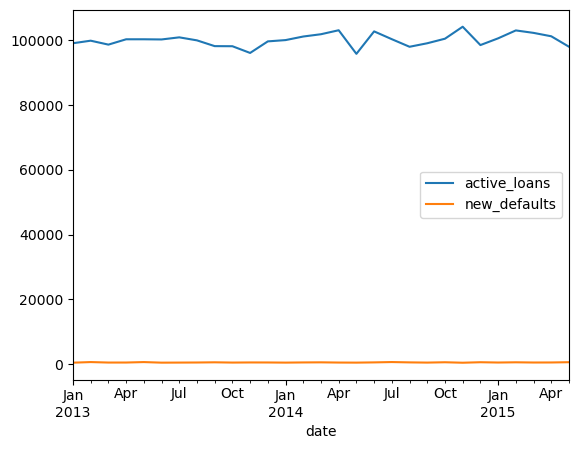

In [148]:
default_timeseries.resample("M").mean().plot()

In [146]:
(default_timeseries
 .assign(ave_active_loans = default_timeseries[["active_loans"]].bfill().rolling(5).mean()))

,active_loans,new_defaults,ave_active_loans
date,,,
2013-01-01,100376.0,21.0,NaN
2013-01-02,NaN,NaN,NaN
2013-01-03,104164.0,33.0,NaN
2013-01-04,104729.0,855.0,NaN
2013-01-07,103716.0,53.0,103429.8
...,...,...,...
2015-05-06,91496.0,479.0,97068.6
2015-05-07,99940.0,485.0,98428.4
2015-05-08,96231.0,661.0,98692.8


### Exercise

Read the default dataset we used above and keed only 2013 and 2014.

Create a data frame with 3 columns: month, mean of active loans for 2013 and 2014. (hint: you have to fill the missing and then you have to use a combination of shift, rolling and pivot functions).

In [160]:
default_timeseries = pd.read_csv("daily_loan_series.csv",
                                 parse_dates=["date"],
                                 date_format = "%d/%m/%Y").bfill()
default_timeseries.head()

,date,active_loans,new_defaults
0,2013-01-01,100376.0,21.0
1,2013-01-02,104164.0,33.0
2,2013-01-03,104164.0,33.0
3,2013-01-04,104729.0,855.0
4,2013-01-07,103716.0,53.0


In [162]:
(default_timeseries[default_timeseries.date.dt.year<2015]
 .assign(month = default_timeseries.date.dt.month,
         year = default_timeseries.date.dt.year)
 .set_index("date")
 .resample("M").mean()
 .pivot(index='month', columns='year', values='active_loans'))
 

year,2013.0,2014.0
month,,
1.0,99357.913043,99812.086957
2.0,100260.500000,101174.400000
3.0,98709.571429,101906.190476
4.0,100528.090909,102976.863636
5.0,100435.652174,95595.363636
6.0,99998.700000,103148.380952
7.0,100958.652174,100793.434783
8.0,99743.090909,98786.523810
9.0,98303.523810,99131.772727


## Data export

### SAS equivalent: PROC EXPORT
```SAS
PROC EXPORT DATA = graded_df
    OUTFILE = 'folder location/processed_data.xlsx'
    DBMS = xlsx REPLACE;
RUN;
```

### To Excel / CSV
We also want to write our summary tables to Excel along with the cleaned source data.

Documentation:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html

In [127]:
# simple, single sheet
full_data.to_excel(f'full_data.xlsx',
                   sheet_name='data',
                   index=False
                  )

In [128]:
full_data.to_csv(f'full_data.csv', index=False)

In [129]:
# opens file with a context manager and specifies the writer object
with pd.ExcelWriter('LoanData.xlsx') as writer:
    
    # apply the to_excel() method to the table you want to write to the file
    Dec_df.to_excel(writer, # pass the writer object as the first arg (positional)
                    sheet_name = 'December', # specify the sheet name
                    index = False) # set index=False if you don't want to include the index
    
    # apply the to_excel() method to the table you want to write to the file
    full_data.to_excel(writer, # pass the writer object as the first arg (positional)
                    sheet_name = 'full_data', # specify the sheet name
                    index = False) # set index=False if you don't want to include the index

### Exercise:

Using the pd.ExcelWriter function, write the following tables to an xlsx file:
- `exposure_def_vol_by_inc`
- `inc_band_summary`
- `purpose_default_summary`
- `default_cr_policy_matrix`
- `default_rate_by_inc_fico`

- name the file: `pivots_summary.xlsx`
- consider whether you should include the index or not

In [130]:
#solution

with pd.ExcelWriter('pivots_summary.xlsx') as writer:
    
    exposure_def_vol_by_inc.to_excel(writer, sheet_name='exposure_def_vol_by_inc',index=True)
    inc_band_summary.to_excel(writer, sheet_name='inc_band_summary',index=True)
    purpose_default_summary.to_excel(writer, sheet_name='purpose_default_summary',index=True)
    default_cr_policy_matrix.to_excel(writer, sheet_name='default_cr_policy_matrix',index=True)
    default_rate_by_inc_fico.to_excel(writer, sheet_name='default_rate_by_inc_fico',index=True)

# Exercise

Define a function that:
- named `EoM_summary`
- takes the `Dec_df` df as an argument
- recreates 2 pivot tables:
    - exposure_def_vol_by_inc
    - purpose_default_summary
- recreates 1 crosstab table:
    - default_rate_by_inc_fico  
- writes these tables to Excel and call the file `Monthly_EoM.xlsx`
- prints a message to say it has finished
- returns None
- includes a docstring

**Extra challenge:**
Can you augment the function to process the raw dataset `loan_data_20221130.csv`.
Consider which of the earlier steps will be required to create the summary tables. Avoid any superfluous work, be as lazy as possible. ;-)

Hint: run it, then try fix the errors.

In [ ]:
# hint

def EoM_summary(df):
    """The function accepts the EoM DataFrame as an argument and produces 3 summary tables which are written to an Excel file.
    Args:
        df (pandas.DataFrame): EoM DataFrame to be summaries
    Returns:
        None
    """
    
    exposure_def_vol_by_inc = df.pivot_table(values=["________", "________"],
                                             index=["________"],
                                             aggfunc="________",
                                             margins=________)
    
    purpose_default_summary = df.________
    
    default_rate_by_inc_fico = ________
    
    
    with pd.ExcelWriter(________) as writer:
        ________.to_excel(writer, sheet_name='________',index=________)
        ________.______________________________________________________
        _______________________________________________________________
    
    
    print(______________________________________________________)
    
    return _____


# invoke the function
EoM_summary(Dec_df)

In [131]:
# solution

def EoM_summary(df):
    """The function accepts the EoM DataFrame as an argument and produces 3 summary tables which are written to an Excel file.
    Args:
        df (pandas.DataFrame): EoM DataFrame to be summaries
    Returns:
        None
    """
    
    exposure_def_vol_by_inc = df.pivot_table(values=["exposure_balance", "in_default"],
                                             index=["income_band"],
                                             aggfunc="sum",
                                             margins=True)
    
    purpose_default_summary = df.pivot_table(values=["facility_id", "exposure_balance", "int_rate"],
                                             index=["purpose"],
                                             columns=["in_default"],
                                             aggfunc={"facility_id": "count",
                                                      "exposure_balance": "sum",
                                                      "int_rate": "mean"},
                                            ).rename(columns={"facility_id": "Volume",
                                                              "exposure_balance": "Exposure",
                                                              "int_rate": "Avg Int Rate"}
                                                    )[["Volume", "Exposure","Avg Int Rate"]]
    
    default_rate_by_inc_fico = pd.crosstab(pd.qcut(df["fico"], q=4),
                                           df["income_band"],
                                           values = df["in_default"],
                                           aggfunc="mean")
    
    
    with pd.ExcelWriter('Monthly_EoM.xlsx') as writer:
        exposure_def_vol_by_inc.to_excel(writer, sheet_name='exposure_def_vol_by_inc',index=True)
        purpose_default_summary.to_excel(writer, sheet_name='purpose_default_summary',index=True)
        default_rate_by_inc_fico.to_excel(writer, sheet_name='default_rate_by_inc_fico',index=True)
    
    
    print("EoM_summary report has been executed successfully.")
    
    return None

EoM_summary(Dec_df)

EoM_summary report has been executed successfully.


In [132]:
# solution: extra challenge

def EoM_summary(df):
    """The function accepts the EoM Raw Data as an argument. It cleans the column names, 
    derives two variables (annual_income and income_band) and 
    produces 3 summary tables which are written to an Excel file.
    Args:
        df (pandas.DataFrame): EoM DataFrame to be summaries
    Returns:
        None
    """
    
    df.columns = [column.replace(".","_") for column in df.columns]
    
    df.rename(columns={"not_fully_paid" : "in_default",
                       "revol_bal" : "exposure_balance"}, inplace=True)
    
    df["annual_income"] = np.round(np.exp(df["log_annual_inc"]), 2)
    
    df['income_band'] = pd.cut(df["annual_income"], bins=[0, 35000, 45000, 55000, 70000, np.inf], precision=2)   
    
    exposure_def_vol_by_inc = df.pivot_table(values=["exposure_balance", "in_default"],
                                             index=["income_band"],
                                             aggfunc="sum",
                                             margins=True)
    
    purpose_default_summary = df.pivot_table(values=["facility_id", "exposure_balance", "int_rate"],
                                             index=["purpose"],
                                             columns=["in_default"],
                                             aggfunc={"facility_id": "count",
                                                      "exposure_balance": "sum",
                                                      "int_rate": "mean"},
                                            ).rename(columns={"facility_id": "Volume",
                                                              "exposure_balance": "Exposure",
                                                              "int_rate": "Avg Int Rate"}
                                                    )[["Volume", "Exposure","Avg Int Rate"]]
    
    default_rate_by_inc_fico = pd.crosstab(pd.qcut(df["fico"], q=4),
                                           df["income_band"],
                                           values = df["in_default"],
                                           aggfunc="mean")
    
    
    with pd.ExcelWriter('Monthly_EoM.xlsx') as writer:
        exposure_def_vol_by_inc.to_excel(writer, sheet_name='exposure_def_vol_by_inc',index=True)
        purpose_default_summary.to_excel(writer, sheet_name='purpose_default_summary',index=True)
        default_rate_by_inc_fico.to_excel(writer, sheet_name='default_rate_by_inc_fico',index=True)
    
    
    print("EoM_summary report has been executed successfully.")
    
    return None

EoM_summary(pd.read_csv('loan_data_20221130.csv'))

EoM_summary report has been executed successfully.
